# <h1 align="center"><b>RATE OF PENETRATION OPTIMIZATION WITH MACHINE LEARNING</b></h1>

## Exploratory Data Analysis for Drilling Parameters

### Environment Setup and Data Load

This section initializes the Python data science environment by importing essential libraries (NumPy, Pandas, Seaborn, Matplotlib) and setting visualization aesthetics. The dataset for well MIP-3HA is loaded into memory, and a preliminary inspection (df.head()) reveals 106 features capturing drilling dynamics such as bit depth, ROP, hook load, and torque. This well-centric data provides the granular resolution necessary for building predictive models for Rate of Penetration (ROP).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
# Turn off all warnings
warnings.filterwarnings('ignore')

# #set seaborn style
# sns.set_style("whitegrid")

### Load Dataset for MIP-3HA well

In [ ]:
MIP3A = pd.read_csv(r'datasets\MIP-3H Top.csv')

In [5]:
MIP3A.head()

,Hole Depth,Rate Of Penetration,Bit Depth,Time Of Penetration,Hook Load,Standpipe Pressure,Mud G/L Alarm State,Rotary RPM,Rotary Torque,Weight on Bit,...,P2 Rate,PVT Mud Tanks Included,PVT Monitor Mud Gain/Loss,PVT Mud G/L Threshold,Trip Tank 1 Refill Status,Flow 1 G/L Threshold,Trip Tank Fill,Trip Tank Accum,YYYY/MM/DD,HH:MM:SS
0,59,4.86,59,12.34,5.5,235,0,20.0,3417.290,6.4,...,-999.25,-999.25,-999.25,0,-999.25,0,-999.25,-999.25,7/7/2015,0:18:18
1,60,16.17,60,3.71,2.9,323,0,20.0,1014.580,6.2,...,-999.25,-999.25,-999.25,0,-999.25,0,-999.25,-999.25,7/7/2015,0:18:47
2,61,29.55,61,2.03,4.6,327,0,20.0,1056.120,6.5,...,-999.25,-999.25,-999.25,0,-999.25,0,-999.25,-999.25,7/7/2015,0:19:23
3,62,38.89,62,1.54,3.3,328,0,20.0,1131.790,6.1,...,-999.25,-999.25,-999.25,0,-999.25,0,-999.25,-999.25,7/7/2015,0:19:47
4,63,49.37,63,1.22,3.3,328,0,20.0,947.821,6.4,...,-999.25,-999.25,-999.25,0,-999.25,0,-999.25,-999.25,7/7/2015,0:20:12


### Feature Listing

By iterating over MIP3A.columns, we generate an explicit enumeration of all recorded features. This audit is crucial for identifying potential input variables and spotting irrelevant or high-noise columns early in the workflow.

In [6]:
for i in MIP3A.columns:
    print(i)


Hole Depth
Rate Of Penetration
Bit Depth
Time Of Penetration
Hook Load
Standpipe Pressure
Mud G/L Alarm State
Rotary RPM
Rotary Torque
Weight on Bit
On Bottom ROP
Total Mud Volume
Trip Tank Mud Volume
Line Wear
Pump 1 total strokes
Pump 2 total strokes
Total Pump Output
TotalPumpDisplacement
Block Height
Min Convertible Torque
Pump 3 total strokes
On Bottom Hours
Circulating Hours
Tool Face
Inclination
Azimuth
H2S
Nitrogen Pressure In
Nitrogen Volume In
Hydrocarbon Flow
MWD Temperature
Total Gas Return
MWD General Variable 1
Condensate Out
MWD General Variable 3
MWD General Variable 4
MWD Vibration XY Gamma
MWD Vibration Z Gamma
Over Pull
Fill Strokes
Total Fill Strokes
Min Pressure
Min Hook Load
Min Torque
Min RPM
Min WOB
Surface Stick Slip Index
MWD DYNAMIC INC
MWD DYNAMIC AZI
Pump Total Strokes Rate
Magnetic Toolface
Gravity Toolface
Cement Fluid Temp
MWD Vibration XYZ
Nitrogen Volume Out
Trip Tank 1 Low Threshold
Trip Tank 1 High Threshold
MWD Vibration Count
Trip Tank 2 Low Thresh

In [7]:
# python -m pip install mitosheet
# python -m jupyter nbextension install --py --user mitosheet
# python -m jupyter nbextension enable --py --user mitosheet

### Visualizing missing values

Using `missingno`, the notebook visualizes and quantifies missing values across the first 20 columns. The absence of nulls in critical features is confirmed both graphically and programmatically. A heatmap reconfirms data completeness, increasing confidence in the reliability of the dataset for model development.

<Axes: >

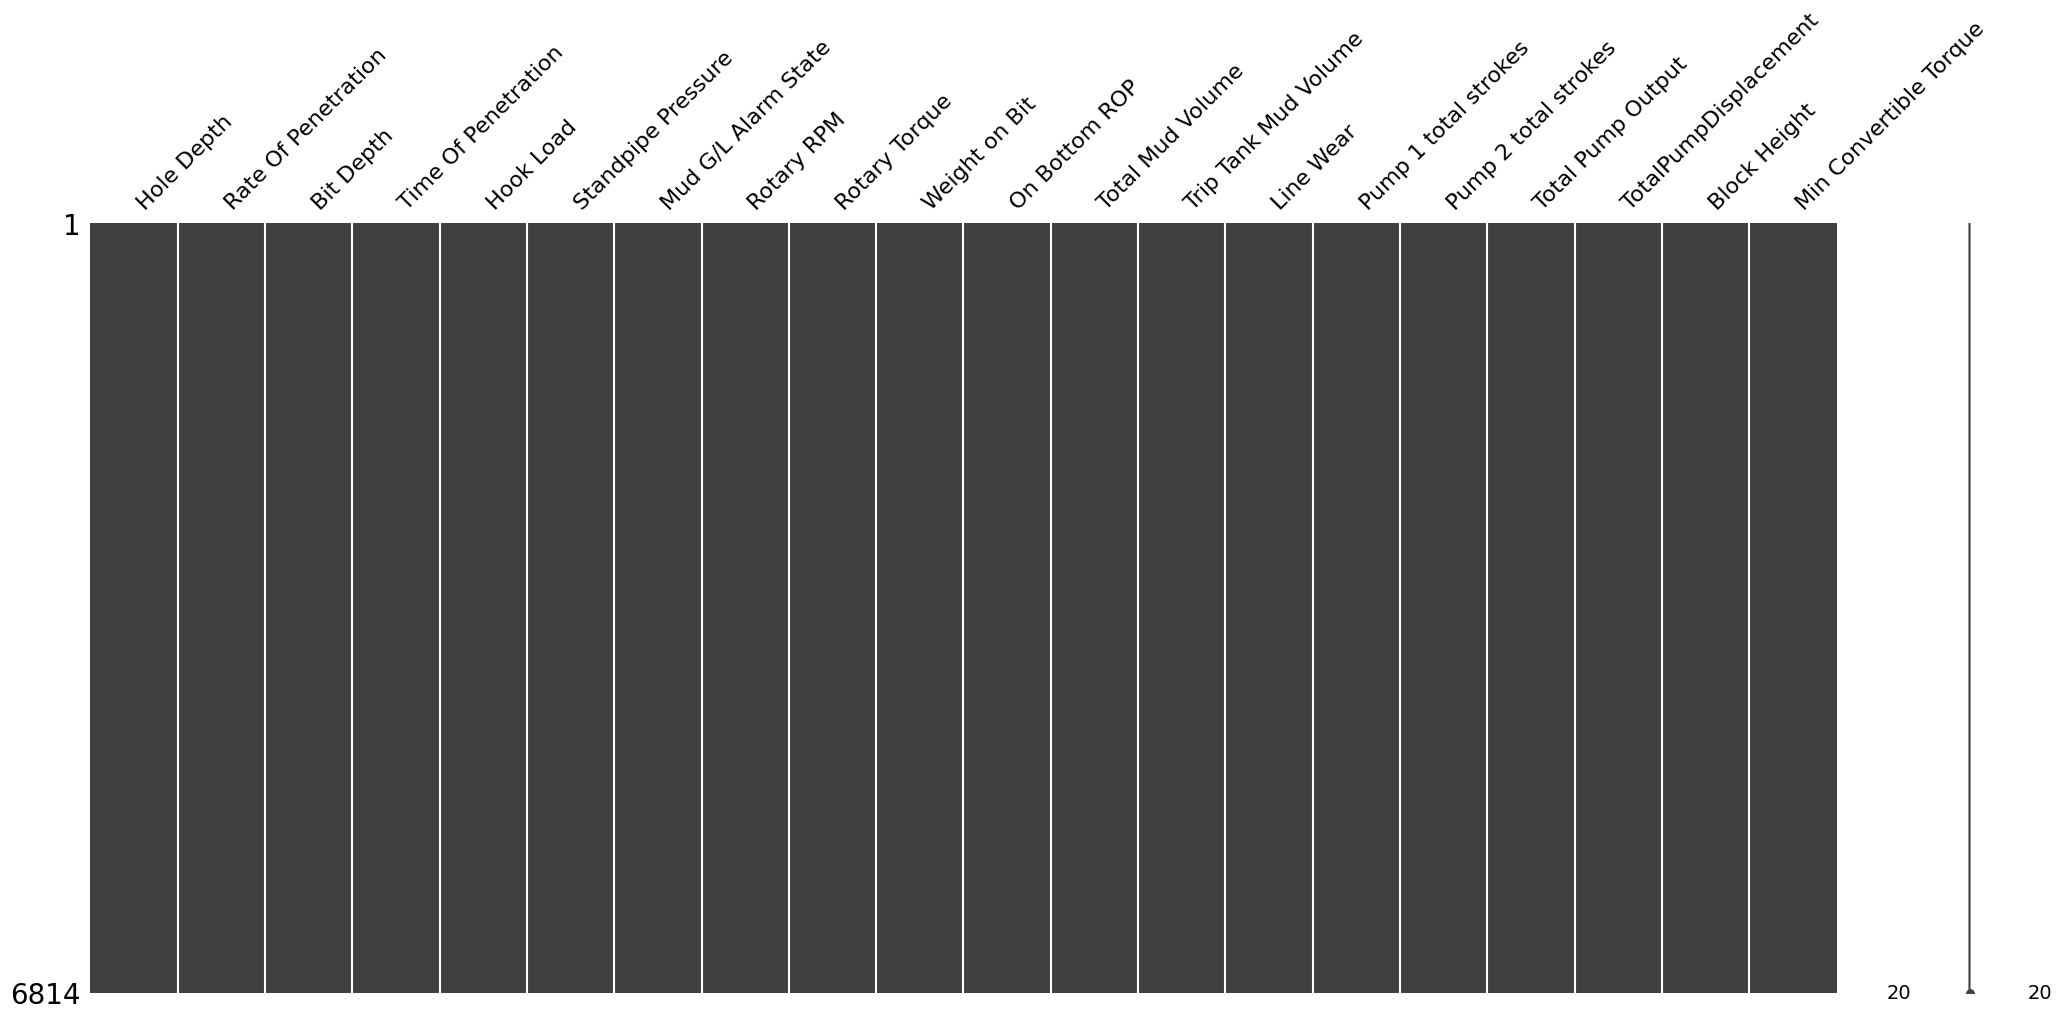

In [ ]:
# pip install missingno

import missingno as msno

msno.matrix(MIP3A[MIP3A.columns[:20]])

In [10]:
missingdata_df=MIP3A.columns[MIP3A.isnull().any()].tolist()
missingdata_df

[]

<Axes: >

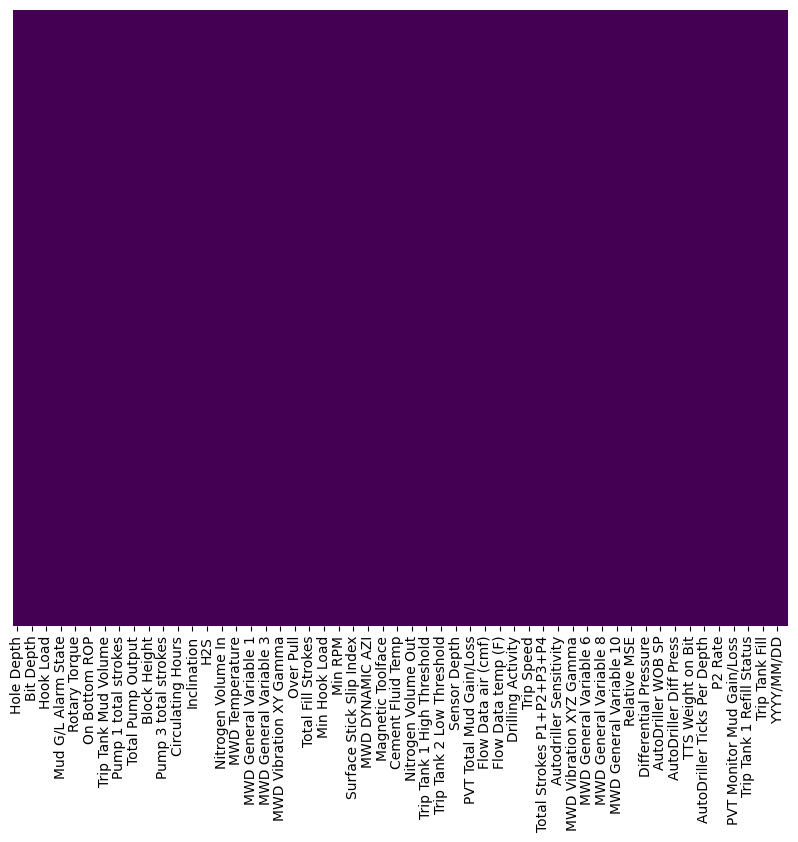

In [11]:
plt.figure(figsize=(10,8))

sns.heatmap(MIP3A.isnull(), yticklabels=False,cbar=False, cmap='viridis')

### Descriptive Statistics and Column Selection

The full statistical summary using `describe()` exposes the distribution range, outliers, and potential noise (e.g., negative ROP values or min RPM = `-999.25`). A subset of key features—Hook Load, RPM, Torque, Weight on Bit (WOB), and Differential Pressure—are selected based on domain relevance to ROP prediction.

In [12]:
df = MIP3A
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hole Depth,6814.0,3489.808483,1983.355552,59.00,1770.250,3490.50,5209.75,6923.00
Rate Of Penetration,6814.0,136.639254,83.642641,0.00,66.035,127.77,212.02,344.80
Bit Depth,6814.0,3489.808483,1983.355552,59.00,1770.250,3490.50,5209.75,6923.00
Time Of Penetration,6814.0,1.321808,13.538207,-999.25,0.280,0.47,0.91,275.12
Hook Load,6814.0,61.885999,26.835081,2.90,40.000,61.15,84.90,121.20
...,...,...,...,...,...,...,...,...
PVT Mud G/L Threshold,6814.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
Trip Tank 1 Refill Status,6814.0,-999.250000,0.000000,-999.25,-999.250,-999.25,-999.25,-999.25
Flow 1 G/L Threshold,6814.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
Trip Tank Fill,6814.0,-999.250000,0.000000,-999.25,-999.250,-999.25,-999.25,-999.25


In [13]:
df = MIP3A
df = df[['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque', 'Weight on Bit', 'Differential Pressure', 'Rate Of Penetration']]
df.columns

Index(['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'Differential Pressure', 'Rate Of Penetration'],
      dtype='object')

Summary Statistics once again

In [14]:
df.describe()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Rate Of Penetration
count,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000
mean,3489.808483,61.885999,76.527077,1810.787893,4.486131,491.818462,136.639254
std,1983.355552,26.835081,420.259129,738.601116,2.146479,53.185868,83.642641
min,59.000000,2.900000,-999.250000,355.860000,0.000000,180.400000,0.000000
25%,1770.250000,40.000000,38.000000,1390.125000,3.100000,456.500000,66.035000
50%,3490.500000,61.150000,41.000000,1625.830000,4.100000,506.750000,127.770000
75%,5209.750000,84.900000,43.000000,2001.930000,5.800000,532.900000,212.020000
max,6923.000000,121.200000,4927.000000,6122.660000,104.400000,571.000000,344.800000


## Plot the Distribution plot and the KDE plots

### Univariate Distributions and Boxplots

This section visually inspects the distributions (via KDE plots) and outlier presence (via boxplots) of the selected drilling parameters. The presence of skewness in RPM and WOB indicates the need for transformations to normalize feature distributions.

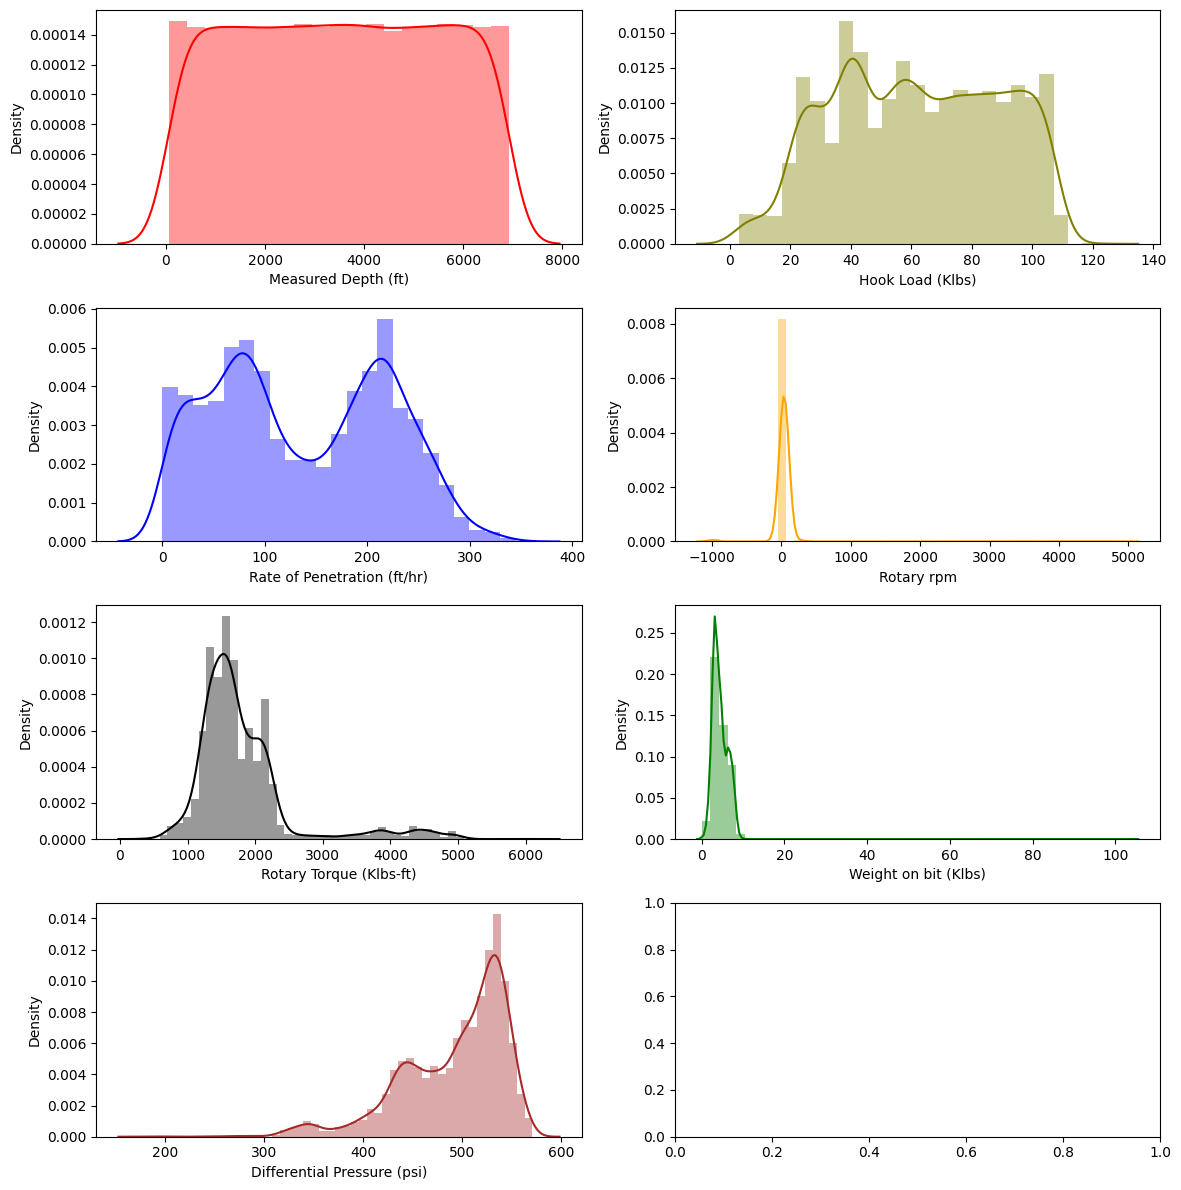

In [15]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))

sns.distplot(df['Hole Depth'], color="red", ax=axes[0, 0], axlabel='Measured Depth (ft)')
sns.distplot(df['Hook Load'], color="olive", ax=axes[0, 1], axlabel='Hook Load (Klbs)')
sns.distplot(df['Rate Of Penetration'], color="blue", ax=axes[1, 0], axlabel='Rate of Penetration (ft/hr)')
sns.distplot(df['Rotary RPM'], color="orange", ax=axes[1, 1], axlabel='Rotary rpm')
sns.distplot(df['Rotary Torque'], color="black", ax=axes[2, 0],axlabel='Rotary Torque (Klbs-ft)')
sns.distplot(df['Weight on Bit'], color="green", ax=axes[2, 1],axlabel='Weight on bit (Klbs)')
sns.distplot(df['Differential Pressure'], color="brown", ax=axes[3, 0],axlabel='Differential Pressure (psi)')
plt.tight_layout()


## Plot Boxplots

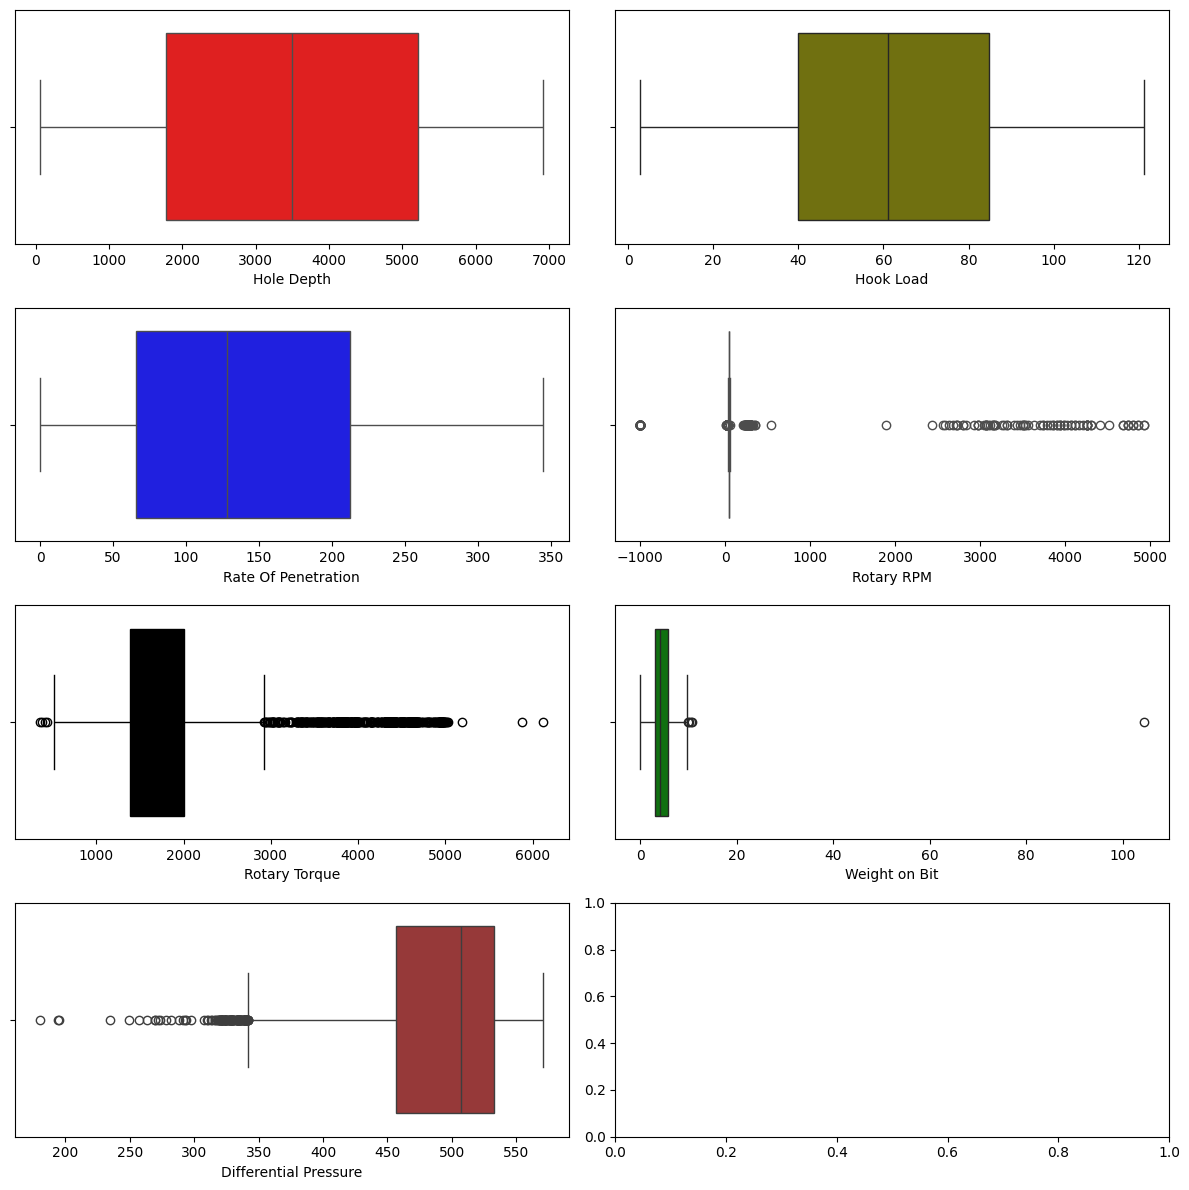

In [16]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(data=df, x=df['Hole Depth'], color="red", ax=axes[0, 0])
sns.boxplot(data=df, x=df['Hook Load'], color="olive", ax=axes[0, 1])
sns.boxplot(data=df, x=df['Rate Of Penetration'], color="blue", ax=axes[1, 0])
sns.boxplot(data=df, x=df['Rotary RPM'], color="orange", ax=axes[1, 1])
sns.boxplot(data=df, x=df['Rotary Torque'], color="black", ax=axes[2, 0])
sns.boxplot(data=df, x=df['Weight on Bit'], color="green", ax=axes[2, 1])
sns.boxplot(data=df, x=df['Differential Pressure'], color="brown", ax=axes[3, 0])
plt.tight_layout()


## Loading and Slicing All Well Data For All MIP wells

Five separate well datasets (MIP3A, MIP3B, MIP5A, MIP5B, MIPSW) are loaded and passed through a custom `slice_columns()` function to retain only the most essential features. A timestamp is constructed from date and time columns to allow time-series alignment. A combined DataFrame of 35,000+ rows is formed.

In [ ]:
MIP3A = pd.read_csv(r'datasets\MIP-3H Top.csv')
MIP3B = pd.read_csv(r'datasets\MIP-3H Bottom.csv')
MIP5A = pd.read_csv(r'datasets\MIP-5H Top.csv')
MIP5B = pd.read_csv(r'datasets\MIP-5H Bottom.csv')
MIPSW = pd.read_csv(r'datasets\MIP-SW.csv')


In [18]:
MIPSW.columns


Index(['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Time Of Penetration',
       'Hook Load', 'Standpipe Pressure', 'Mud G/L Alarm State', 'Rotary RPM',
       'Rotary Torque', 'Weight on Bit', 'On Bottom ROP', 'Total Mud Volume',
       'Trip Tank Mud Volume', 'Line Wear', 'Pump 1 total strokes',
       'Pump 2 total strokes', 'Total Pump Output', 'TotalPumpDisplacement',
       'Block Height', 'Pump 3 total strokes', 'On Bottom Hours',
       'Circulating Hours', 'Tool Face', 'Inclination', 'Azimuth', 'H2S',
       'Nitrogen Pressure In', 'Nitrogen Volume In', 'Hydrocarbon Flow',
       'Nitrogen Volume Out', 'Total Gas Return', 'Condensate Out',
       'Over Pull', 'Fill Strokes', 'Total Fill Strokes', 'Min Pressure',
       'Min Hook Load', 'Min Torque', 'Min RPM', 'Min WOB',
       'Surface Stick Slip Index', 'MWD DYNAMIC INC', 'MWD DYNAMIC AZI',
       'Pump Total Strokes Rate', 'Magnetic Toolface', 'Gravity Toolface',
       'Bit RPM', 'Trip Tank 1 Low Threshold', 'Trip Ta

In [19]:
columns = ['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Hook Load', 'Standpipe Pressure', 'Rotary RPM',
           'Rotary Torque', 'Weight on Bit', 'On Bottom ROP', 'Total Mud Volume','Block Height', 'On Bottom Hours',
           'Circulating Hours', 'Tool Face', 'Inclination', 'Azimuth', 'Differential Pressure','Mud Motor Used', 'YYYY/MM/DD', 
           'HH:MM:SS','EDR Instantaneous ROP']

In [20]:
def slice_columns(data):
    columns = ['Hole Depth', 'Rate Of Penetration', 'Bit Depth', 'Hook Load', 'Standpipe Pressure', 'Rotary RPM',
           'Rotary Torque', 'Weight on Bit', 'On Bottom ROP', 'Block Height', 'On Bottom Hours',
           'Circulating Hours', 'Tool Face', 'Inclination', 'Azimuth', 'Differential Pressure', 'YYYY/MM/DD', 
           'HH:MM:SS']
    df = data[columns]
    return df

In [21]:
slice_columns(MIP3B)

,Hole Depth,Rate Of Penetration,Bit Depth,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,Block Height,On Bottom Hours,Circulating Hours,Tool Face,Inclination,Azimuth,Differential Pressure,YYYY/MM/DD,HH:MM:SS
0,1,0.32,1,43.6,0,0,0.033,111.6,0.32,99.1,52.7,636.1,0.00,90.3,125.82,-999.25,8/28/2015,15:11:40
1,2,0.00,2,39.4,0,0,0.029,0.0,0.00,74.1,52.7,636.1,0.00,90.3,125.82,-999.25,8/28/2015,15:11:42
2,3,0.00,3,39.3,0,0,0.029,0.0,0.00,72.5,52.7,636.1,0.00,90.3,125.82,-999.25,8/28/2015,15:11:43
3,4,0.00,4,39.2,0,0,0.029,112.0,0.00,71.3,52.7,636.1,0.00,90.3,125.82,-999.25,8/28/2015,15:11:44
4,5,0.00,5,39.3,0,0,0.029,111.9,0.00,70.3,52.7,636.1,0.00,90.3,125.82,-999.25,8/28/2015,15:11:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,13875,81.93,13875,136.3,0,0,0.044,0.0,81.93,39.4,65.0,925.1,-999.25,90.8,323.29,-999.25,9/26/2015,9:26:28
9087,13876,230.37,13876,135.8,0,0,0.044,0.0,230.37,38.5,65.0,925.1,-999.25,90.8,323.29,-999.25,9/26/2015,9:26:42
9088,13877,285.93,13877,136.1,0,0,0.044,0.0,285.93,37.5,65.0,925.1,-999.25,90.8,323.29,-999.25,9/26/2015,9:26:51
9089,13878,358.26,13878,136.2,0,0,0.044,0.0,358.26,36.6,65.0,925.1,-999.25,90.8,323.29,-999.25,9/26/2015,9:27:01


### Combined Dataset Exploration

We re-run descriptive statistics across the multi-well dataset and validate well representation counts. Notably, Tool Face contains only a single static value (1234) and is removed due to lack of variability. We replace placeholder nulls (-999.25) with actual NaNs and drop affected rows.

In [22]:
def combine_and_transform():

    wells = [MIP3A, MIP3A, MIP5A, MIP5B, MIPSW]
    well_names = ['MIP3A', 'MIP3B', 'MIP5A', 'MIP5B', 'MIPSW']
    combined_df = pd.DataFrame()

    for well, well_name in zip(wells, well_names):

        # Select only the columns we want to use with our custom function - slice_columns
        df = slice_columns(well)

        # Add a column to with well_id to distinguish each well data from the other
        df['Well ID'] = well_name

        #Combine all wells data
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        
    # Merge 'YYYY/MM/DD' and 'HH:MM:SS' columns and convert to datetime format
    combined_df['TimeStamp'] = pd.to_datetime(combined_df['YYYY/MM/DD'] + ' ' + combined_df['HH:MM:SS'])
        
    return combined_df

In [23]:
df = combine_and_transform()
df.head()

,Hole Depth,Rate Of Penetration,Bit Depth,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,Block Height,On Bottom Hours,Circulating Hours,Tool Face,Inclination,Azimuth,Differential Pressure,YYYY/MM/DD,HH:MM:SS,Well ID,TimeStamp
0,59,4.86,59,5.5,235,20.0,3417.290,6.4,4.86,34.2,0.0,0.1,1234.0,2.9,154.06,234.6,7/7/2015,0:18:18,MIP3A,2015-07-07 00:18:18
1,60,16.17,60,2.9,323,20.0,1014.580,6.2,16.17,33.8,0.0,0.1,1234.0,2.9,154.06,323.2,7/7/2015,0:18:47,MIP3A,2015-07-07 00:18:47
2,61,29.55,61,4.6,327,20.0,1056.120,6.5,29.55,32.8,0.0,0.1,1234.0,2.9,154.06,327.4,7/7/2015,0:19:23,MIP3A,2015-07-07 00:19:23
3,62,38.89,62,3.3,328,20.0,1131.790,6.1,38.89,31.7,0.0,0.1,1234.0,2.9,154.06,328.4,7/7/2015,0:19:47,MIP3A,2015-07-07 00:19:47
4,63,49.37,63,3.3,328,20.0,947.821,6.4,49.37,30.9,0.0,0.1,1234.0,2.9,154.06,328.4,7/7/2015,0:20:12,MIP3A,2015-07-07 00:20:12


In [24]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Hole Depth,35645.0,5087.240118,41.0,2278.0,4528.0,6767.0,14454.0,3573.86868
Rate Of Penetration,35645.0,147.491189,0.0,85.49,154.77,202.76,631.49,75.528408
Bit Depth,35645.0,5087.240118,41.0,2278.0,4528.0,6767.0,14454.0,3573.86868
Hook Load,35645.0,74.911497,2.9,41.8,71.3,103.2,156.4,37.554743
Standpipe Pressure,35645.0,1083.203928,0.0,421.0,508.0,556.0,3991.0,1178.026531
Rotary RPM,35645.0,76.18901,-999.25,39.0,43.0,57.0,4993.0,364.924043
Rotary Torque,35645.0,1536.32271,1.326,939.661,1559.07,2108.75,9793.86,1107.30281
Weight on Bit,35645.0,7.665294,0.0,3.1,4.5,7.7,104.4,7.267123
On Bottom ROP,35645.0,147.478507,0.0,85.48,154.74,202.76,631.49,75.540866
Block Height,35645.0,35.732437,0.0,15.7,27.1,45.0,131.8,29.430776


In [25]:
df['Well ID'].value_counts()

Well ID
MIP5B    7999
MIPSW    7553
MIP3A    6814
MIP3B    6814
MIP5A    6465
Name: count, dtype: int64

In [26]:
# Clean the null values

df = df.replace(-999.25, np.NaN)

<Axes: >

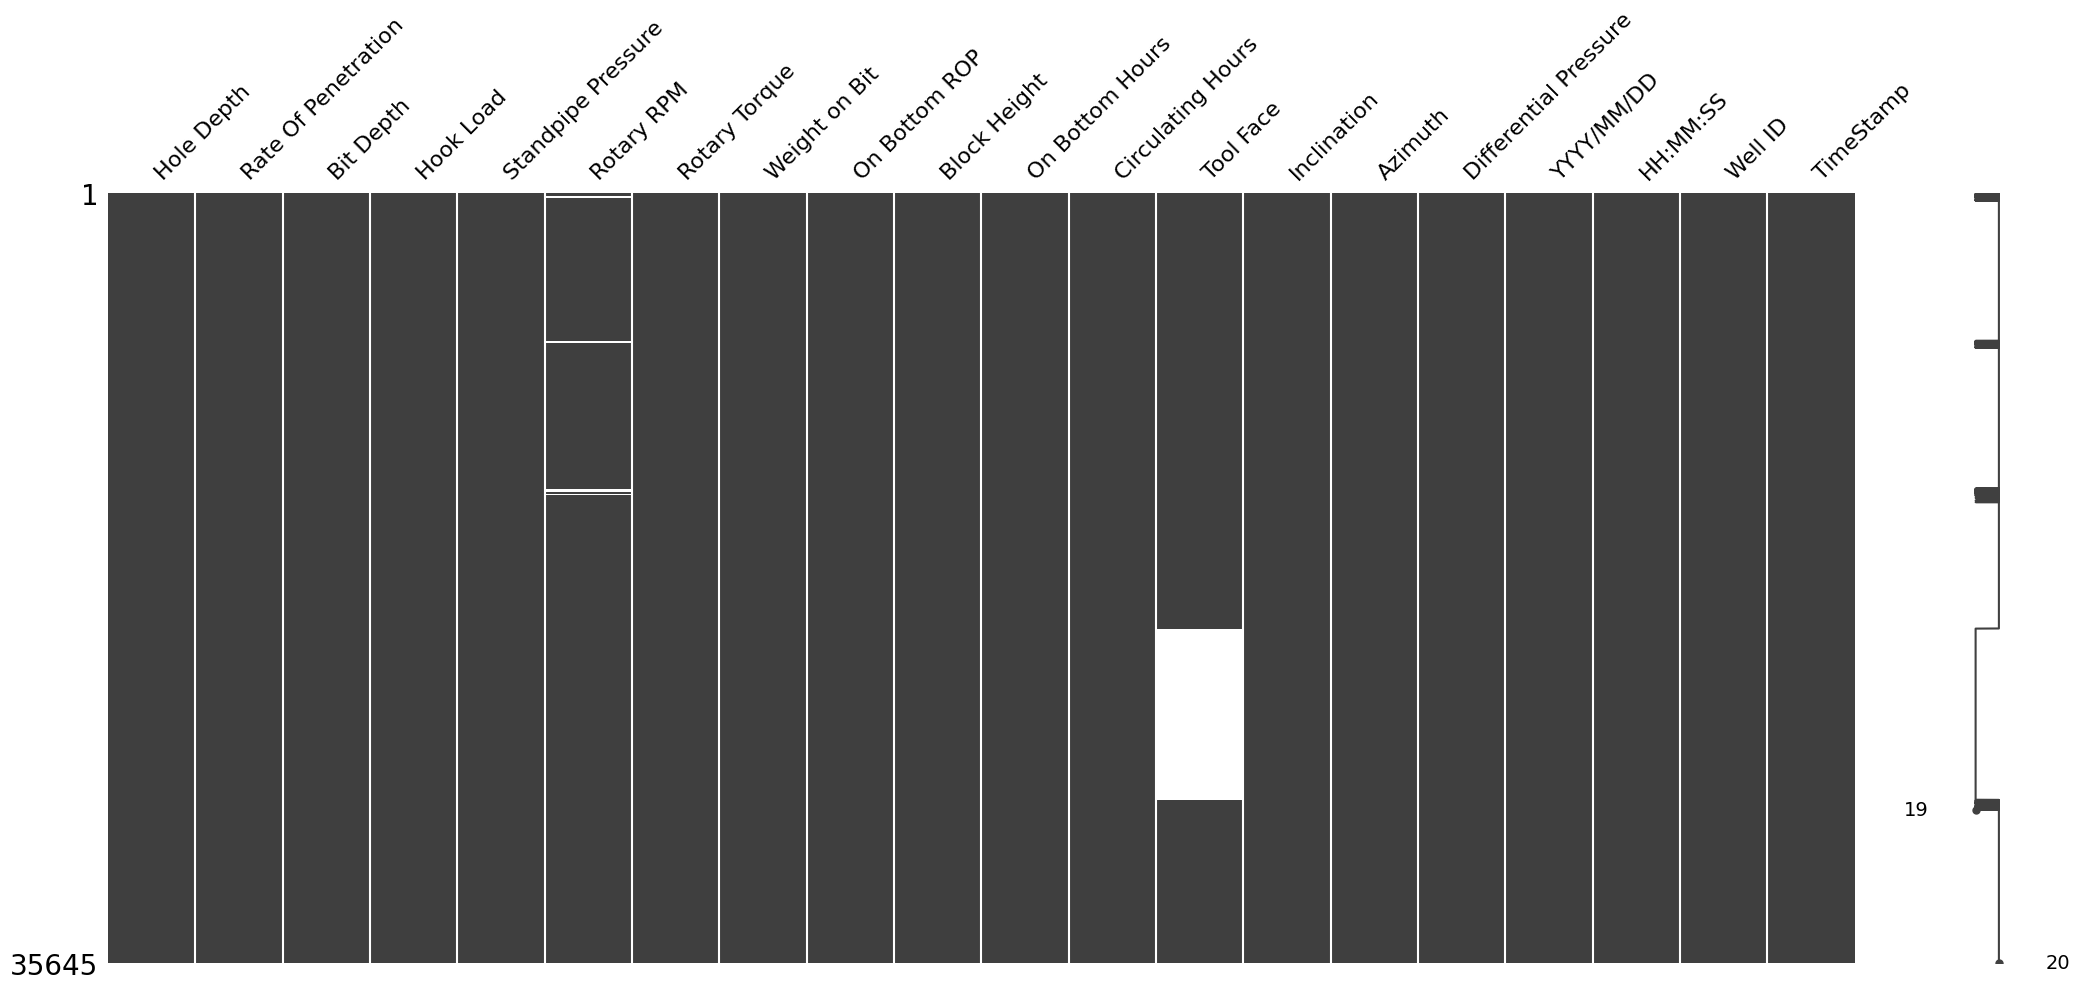

In [27]:
import missingno as msno

msno.matrix(df)

In [28]:
# # Set null if bit position is greater than hole depth by more than 0.02 ft, then drop those rows
# df = df.mask(df['Hole Depth'] - df['Bit Depth'] < -0.02)
# df = df.dropna(subset=['Hole Depth'])

In [29]:
missingdata_df = df.columns[df.isnull().any()].tolist()
missingdata_df

['Rotary RPM', 'Tool Face']

In [30]:
df['Tool Face'].head()

0    1234.0
1    1234.0
2    1234.0
3    1234.0
4    1234.0
Name: Tool Face, dtype: float64

In [31]:
# Drop rows with null values in all columns
df = df.drop(columns='Tool Face')
df = df.dropna()


### Final Cleaning and Univariate Re-analysis

After dropping Tool Face, the dataset is re-summarized and re-visualized. The new distribution plots show corrected ranges and improved normality, enabling better feature scaling and model interpretability.

In [33]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Hole Depth,35398.0,5120.997994,41.0,2324.0,4558.5,6782.0,14454.0,3563.301315
Rate Of Penetration,35398.0,147.814762,0.0,85.77,155.57,203.11,631.49,75.589874
Bit Depth,35398.0,5120.997994,41.0,2324.0,4558.5,6782.0,14454.0,3563.301315
Hook Load,35398.0,75.335996,2.9,42.1,71.8,103.4,156.4,37.33511
Standpipe Pressure,35398.0,1087.66145,0.0,420.0,509.0,557.0,3991.0,1180.908549
Rotary RPM,35398.0,83.693203,0.0,39.0,43.0,57.0,4993.0,354.9253
Rotary Torque,35398.0,1539.125578,1.326,942.628,1561.665,2112.46,9793.86,1110.160239
Weight on Bit,35398.0,7.670916,0.0,3.1,4.5,7.7,104.4,7.291399
On Bottom ROP,35398.0,147.801992,0.0,85.7325,155.56,203.11,631.49,75.602464
Block Height,35398.0,35.739067,0.0,15.6,27.0,45.1,131.8,29.512499


In [34]:
def plot_all_dist(df):
    # Plot the distribution of all parameters
    f, axes = plt.subplots(4, 2, figsize=(12, 12))

    sns.distplot(df['Hole Depth'], color="red", ax=axes[0, 0], axlabel='Measured Depth (ft)')

    sns.distplot(df['Hook Load'], color="olive", ax=axes[0, 1], axlabel='Hook Load (Klbs)')

    sns.distplot(df['Rate Of Penetration'], color="blue", ax=axes[1, 0], axlabel='Rate of Penetration (ft/hr)')

    sns.distplot(df['Rotary RPM'], color="orange", ax=axes[1, 1], axlabel='Rotary rpm')

    sns.distplot(df['Rotary Torque'], color="black", ax=axes[2, 0],axlabel='Rotary Torque (Klbs-ft)')

    sns.distplot(df['Weight on Bit'], color="green", ax=axes[2, 1],axlabel='Weight on bit (Klbs)')

    sns.distplot(df['Differential Pressure'], color="brown", ax=axes[3, 0],axlabel='Differential Pressure (psi)')
    
    plt.tight_layout()


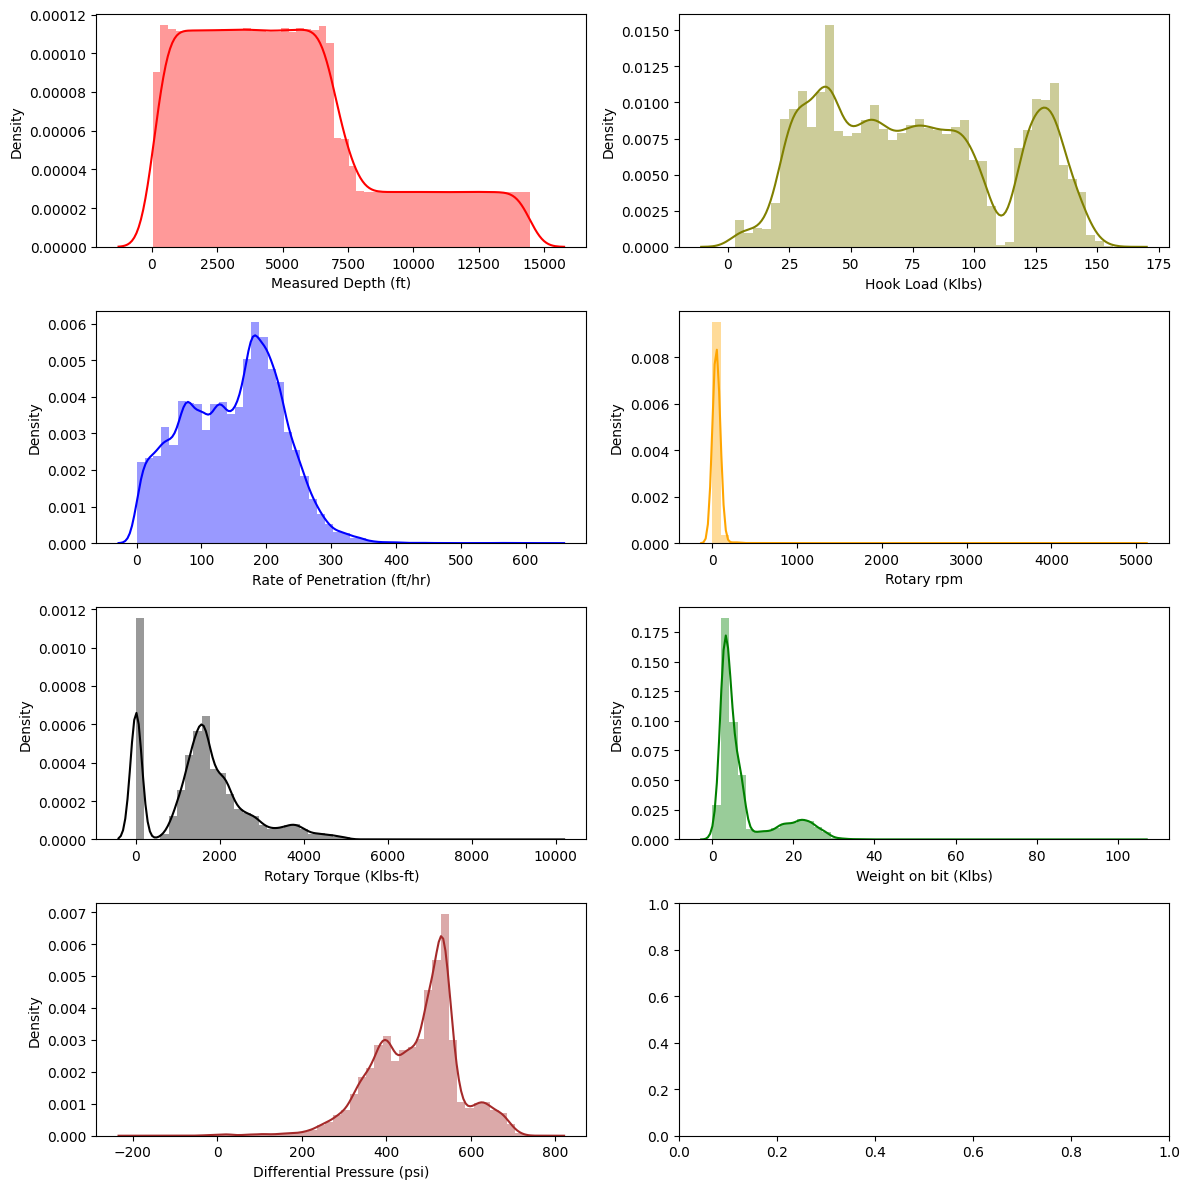

In [35]:
plot_all_dist(df)

### Outlier Filtering for Key Variables

The notebook now applies domain-informed outlier filtering to reduce noise:

RPM: Remove extreme values >100

WOB: Limit to values <40 Klbs

Torque: Filter to <4900 ft-lbs

Differential Pressure: Clipped to [190, 720]

ROP: Capped at 385 ft/hr
This results in a clean, trimmed dataset with coherent physical ranges for each variable.

### Rotary RPM

In [36]:
RPM_clean = df[(df['Rotary RPM'] > 0) & (df['Rotary RPM'] < 100)]
RPM_clean['Rotary RPM'].describe().transpose()


count    33655.000000
mean        46.652384
std         14.379209
min          9.000000
25%         39.000000
50%         43.000000
75%         56.000000
max         99.000000
Name: Rotary RPM, dtype: float64

<Axes: xlabel='Rotary RPM', ylabel='Count'>

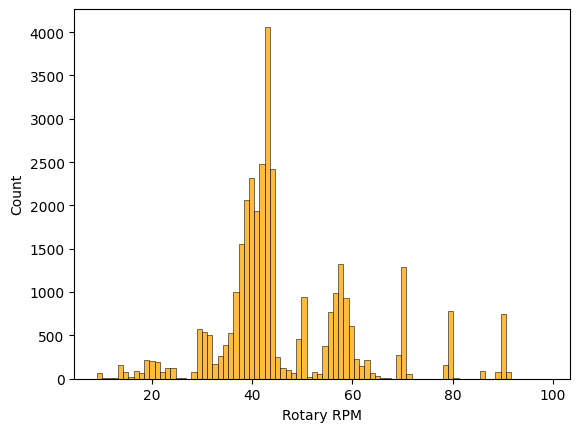

In [37]:
sns.histplot(RPM_clean['Rotary RPM'], color="orange")#, axlabel='Rotary rpm')

In [38]:
RPM_clean['Rotary RPM'].skew()

0.9609800590297319

<Axes: xlabel='Rotary RPM'>

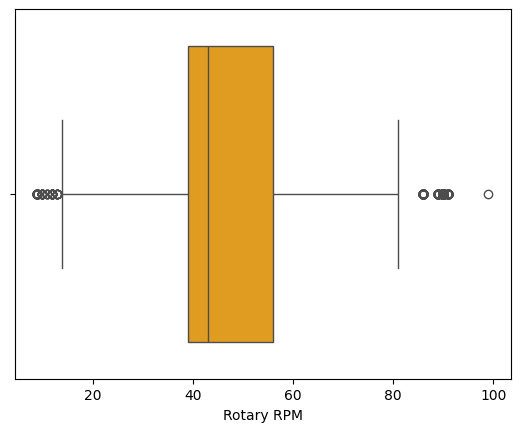

In [39]:
sns.boxplot(data=RPM_clean, x=RPM_clean['Rotary RPM'], color="orange")

In [40]:
RPM_clean1 = df[df['Rotary RPM'] > 100]
len(RPM_clean1)

655

In [41]:
RPM_clean.head()

,Hole Depth,Rate Of Penetration,Bit Depth,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,Block Height,On Bottom Hours,Circulating Hours,Inclination,Azimuth,Differential Pressure,YYYY/MM/DD,HH:MM:SS,Well ID,TimeStamp
0,59,4.86,59,5.5,235,20.0,3417.290,6.4,4.86,34.2,0.0,0.1,2.9,154.06,234.6,7/7/2015,0:18:18,MIP3A,2015-07-07 00:18:18
1,60,16.17,60,2.9,323,20.0,1014.580,6.2,16.17,33.8,0.0,0.1,2.9,154.06,323.2,7/7/2015,0:18:47,MIP3A,2015-07-07 00:18:47
2,61,29.55,61,4.6,327,20.0,1056.120,6.5,29.55,32.8,0.0,0.1,2.9,154.06,327.4,7/7/2015,0:19:23,MIP3A,2015-07-07 00:19:23
3,62,38.89,62,3.3,328,20.0,1131.790,6.1,38.89,31.7,0.0,0.1,2.9,154.06,328.4,7/7/2015,0:19:47,MIP3A,2015-07-07 00:19:47
4,63,49.37,63,3.3,328,20.0,947.821,6.4,49.37,30.9,0.0,0.1,2.9,154.06,328.4,7/7/2015,0:20:12,MIP3A,2015-07-07 00:20:12


In [42]:
def extract_boxplot_values(data, column_name):
    boxplot_dict = plt.boxplot(data[column_name])
    # Close the plot without displaying it
    plt.close()

    # Get the quartiles (Q1, median, Q3)
    quartiles = [item.get_ydata()[0] for item in boxplot_dict['medians']]
    Q1, median, Q3 = quartiles if len(quartiles) == 3 else (None, None, None)

    # Get whiskers (min and max values within 1.5 * IQR)
    whiskers = [item.get_ydata() for item in boxplot_dict['whiskers']]
    lower_whisker, upper_whisker = whiskers[0][0], whiskers[1][-1] if len(whiskers[1]) > 0 else (None, None)
    whiskers_dict = {'lower_whisker': lower_whisker, 'upper_whisker': upper_whisker}

    return whiskers_dict;

In [43]:
def plot_box_dist(data, column_name, color):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=data[column_name], color = color)
    plt.title(f'Boxplot of {column_name}')

    plt.subplot(1, 2, 2)
    sns.distplot(data[column_name], hist=True, kde=True, bins=20, color=color, hist_kws={'edgecolor': 'black'})
    plt.title(f'Distribution Plot of {column_name}')


    plt.tight_layout()
    plt.show()

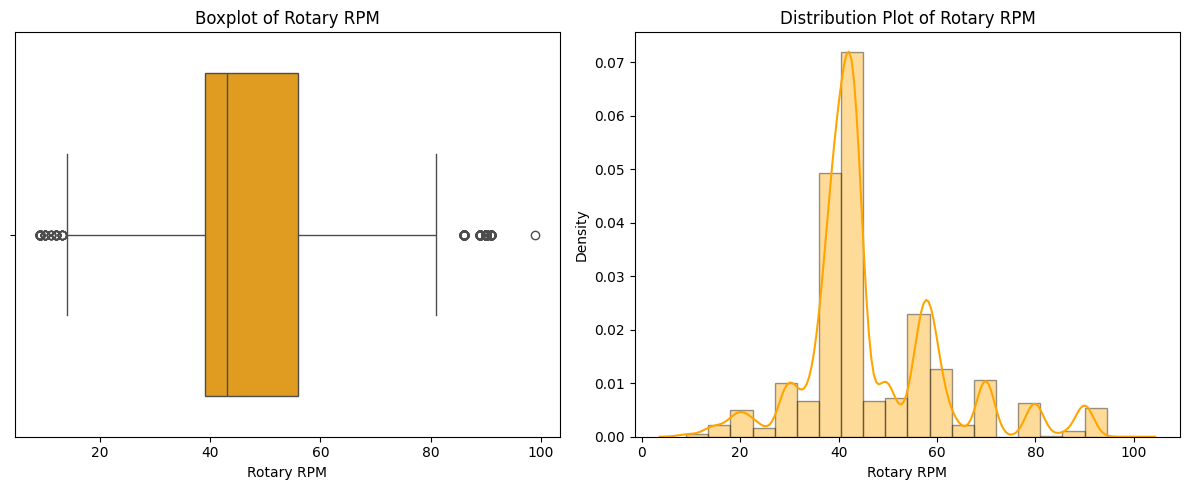

In [44]:
plot_box_dist(RPM_clean, 'Rotary RPM', 'orange')

<Axes: >

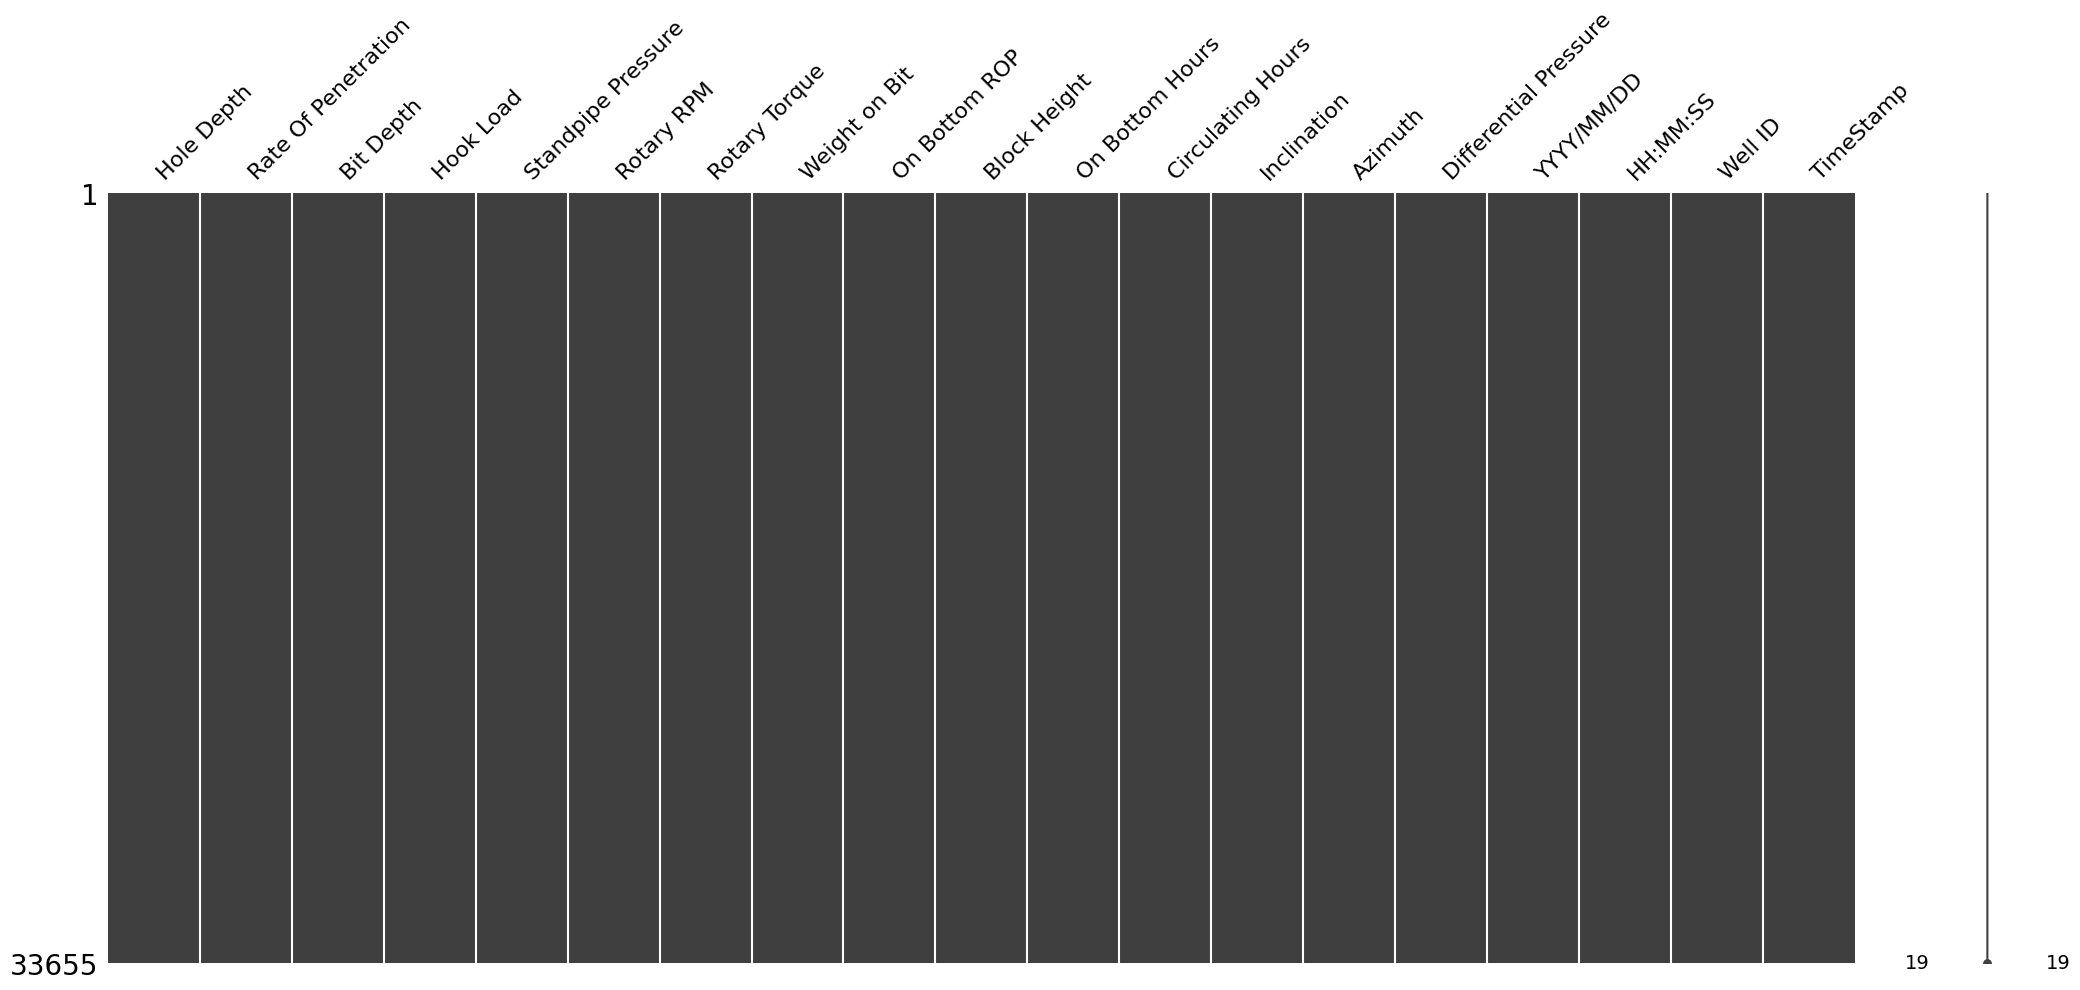

In [45]:
msno.matrix(RPM_clean)

### WOB Correction

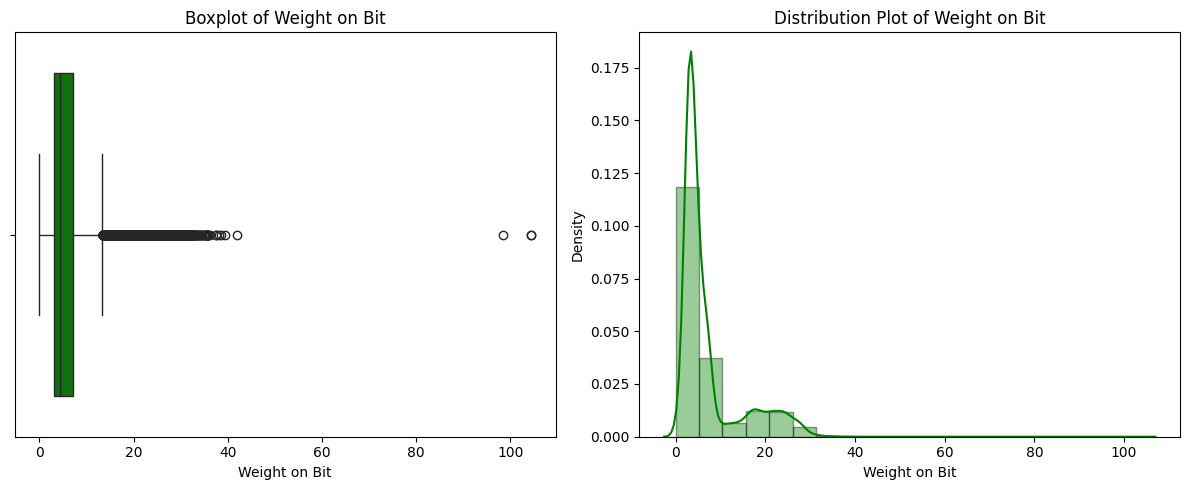

In [46]:
plot_box_dist(RPM_clean, 'Weight on Bit', 'green')

In [47]:
RPM_clean['Weight on Bit'].describe()

count    33655.000000
mean         7.202665
std          6.957322
min          0.000000
25%          3.100000
50%          4.300000
75%          7.200000
max        104.400000
Name: Weight on Bit, dtype: float64

In [48]:
WOB_clean = RPM_clean[RPM_clean['Weight on Bit'] < 40]


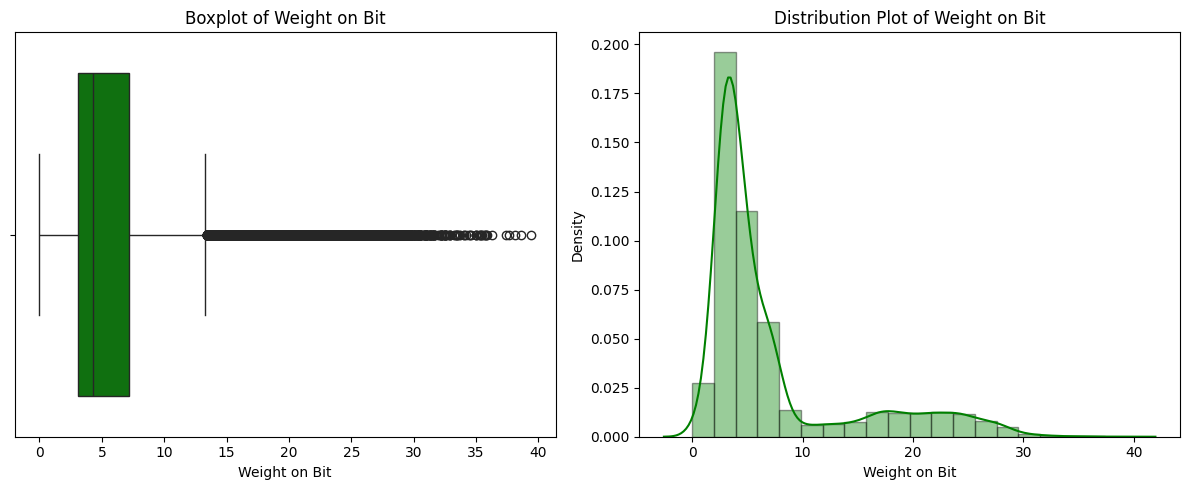

In [49]:
plot_box_dist(WOB_clean, 'Weight on Bit', 'green')

In [50]:
extract_boxplot_values(RPM_clean, 'Weight on Bit')

{'lower_whisker': 3.1, 'upper_whisker': 13.3}

In [51]:
WOB_clean['Weight on Bit'].describe()

count    33651.000000
mean         7.193144
std          6.896739
min          0.000000
25%          3.100000
50%          4.300000
75%          7.200000
max         39.400000
Name: Weight on Bit, dtype: float64

In [52]:
WOB_clean1 = df[df['Weight on Bit'] > 40]
len(WOB_clean1)

4

### Correcting Rotary Torque

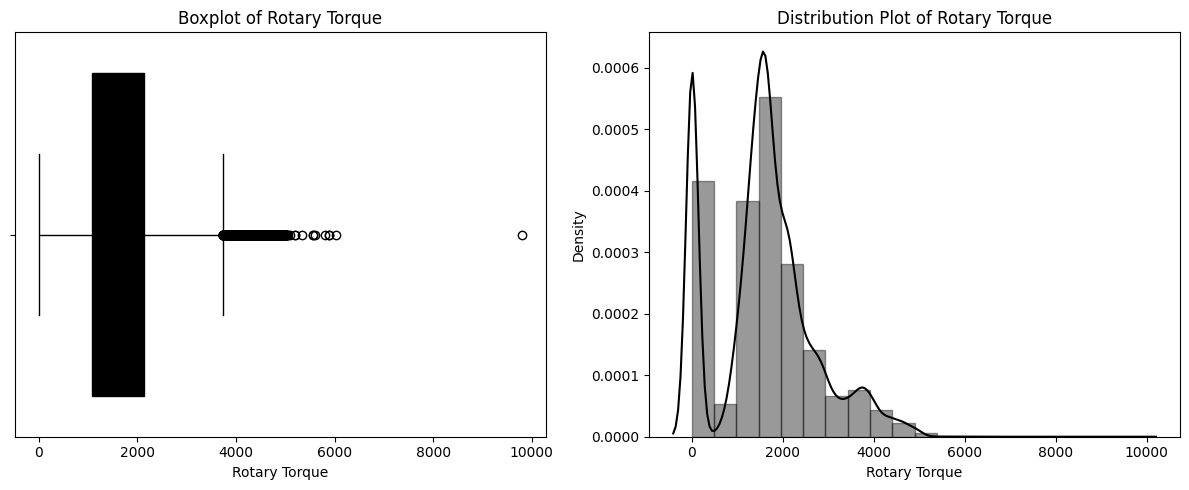

In [53]:
plot_box_dist(WOB_clean, 'Rotary Torque', 'black')

In [54]:
RT_clean = WOB_clean[WOB_clean['Rotary Torque'] < 4900]


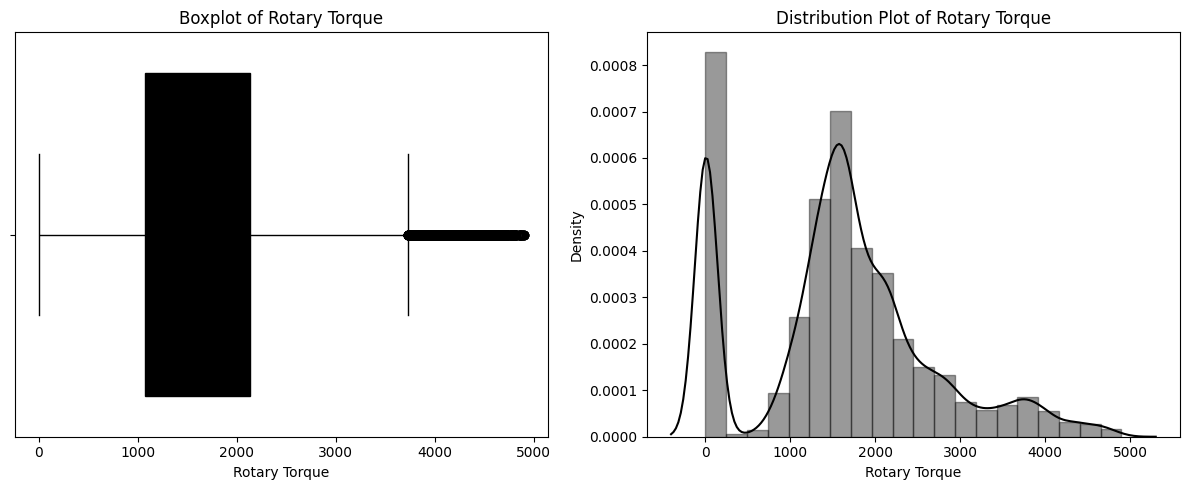

In [55]:
plot_box_dist(RT_clean, 'Rotary Torque', 'black')

In [56]:
RT_clean['Rotary Torque'].describe()

count    33557.000000
mean      1588.060353
std       1081.829538
min          1.326000
25%       1067.990000
50%       1591.710000
75%       2131.740000
max       4898.680000
Name: Rotary Torque, dtype: float64

In [57]:
RT_clean['Rotary Torque'].skew()

0.3560146324226378

In [58]:
RT_clean1 = WOB_clean[WOB_clean['Rotary Torque'] > 3700]
len(RT_clean1)

1811

### Differential Pressure

In [59]:
RT_clean['Differential Pressure'].describe()

count    33557.000000
mean       467.972337
std         99.716124
min       -195.600000
25%        399.400000
50%        489.700000
75%        534.600000
max        783.300000
Name: Differential Pressure, dtype: float64

<Axes: xlabel='Differential Pressure', ylabel='Density'>

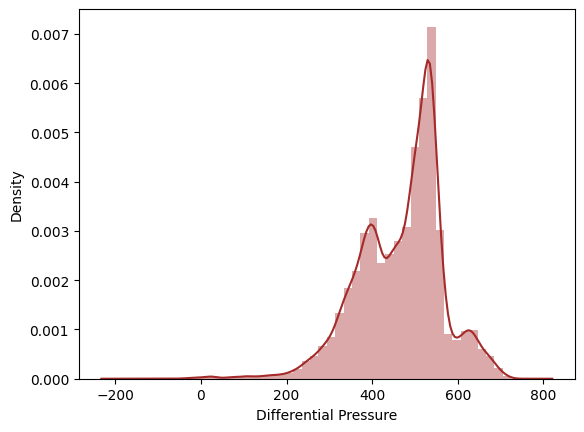

In [60]:
sns.distplot(RT_clean['Differential Pressure'], color="brown", axlabel='Differential Pressure')

<Axes: xlabel='Differential Pressure'>

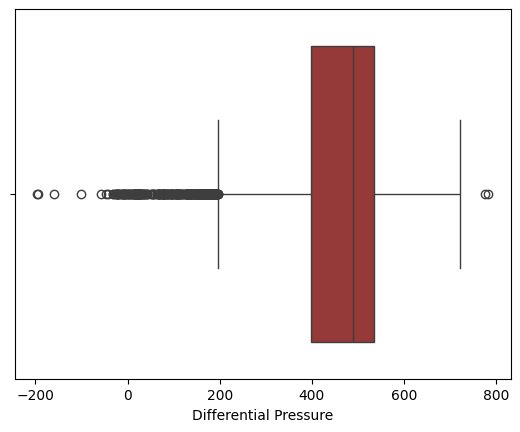

In [61]:
sns.boxplot(data=RT_clean, x=RT_clean['Differential Pressure'], color="brown")

<Axes: xlabel='Differential Pressure'>

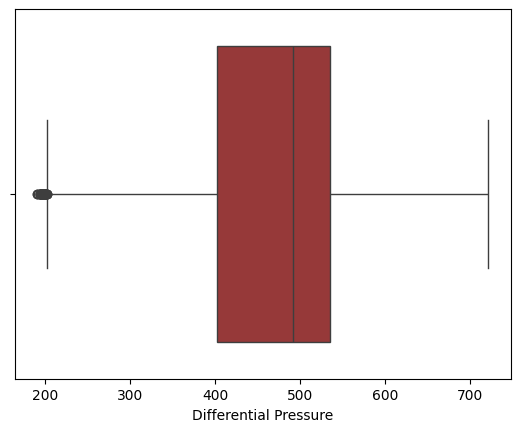

In [62]:
DF_clean = RT_clean[(RT_clean['Differential Pressure'] > 190) & (RT_clean['Differential Pressure'] < 770)]
sns.boxplot(data=DF_clean, x=DF_clean['Differential Pressure'], color="brown")

<Axes: xlabel='Differential Pressure', ylabel='Density'>

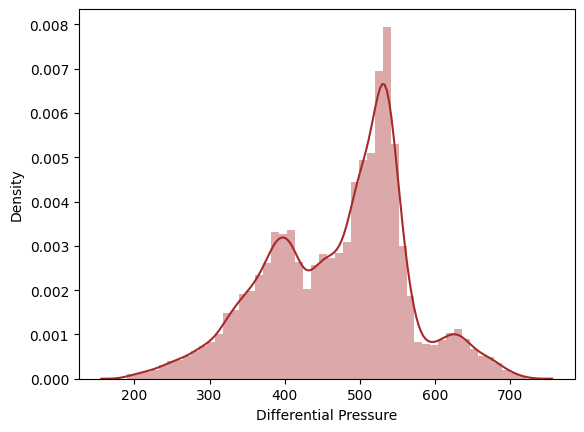

In [63]:
sns.distplot(DF_clean['Differential Pressure'], color="brown", axlabel='Differential Pressure')

In [64]:
DF_clean['Differential Pressure'].skew()

-0.2870205091897504

In [65]:
RT_clean1 = RT_clean[RT_clean['Differential Pressure'] < 0]
len(RT_clean1)

31

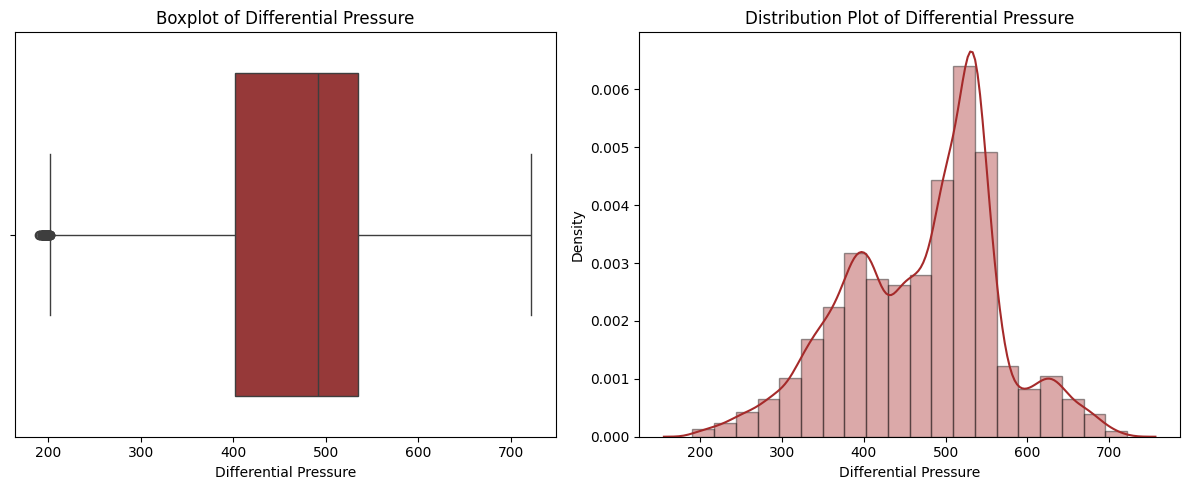

In [66]:
plot_box_dist(DF_clean, "Differential Pressure","brown")

In [67]:
extract_boxplot_values(DF_clean, "Differential Pressure")

{'lower_whisker': 401.8, 'upper_whisker': 721.5}

### Rate Of Penetration

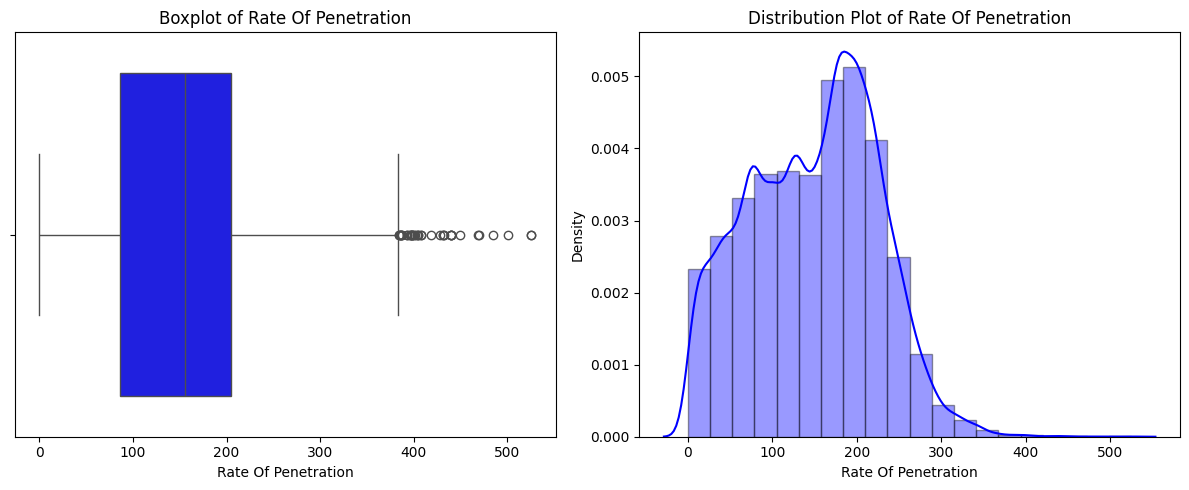

In [68]:
plot_box_dist(DF_clean, "Rate Of Penetration","blue")

In [69]:
DF_clean['Rate Of Penetration'].describe()

count    33229.000000
mean       148.255339
std         75.955150
min          0.000000
25%         85.770000
50%        155.050000
75%        205.030000
max        525.270000
Name: Rate Of Penetration, dtype: float64

In [70]:
extract_boxplot_values(DF_clean, "Rate Of Penetration")

{'lower_whisker': 85.77, 'upper_whisker': 383.12}

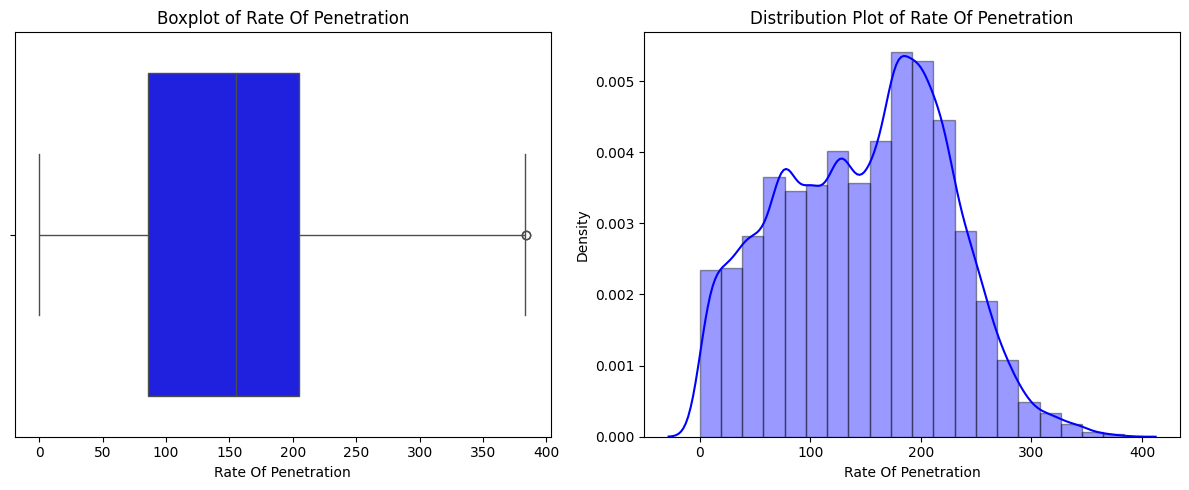

In [71]:
ROP_clean = DF_clean[DF_clean['Rate Of Penetration'] < 385]
plot_box_dist(ROP_clean, "Rate Of Penetration", color='blue')

### Pairwise Feature Exploration

A pairplot is used to cross-correlate ROP and other variables. Patterns in the scatterplots offer preliminary insight into possible nonlinear relationships, warranting more complex modeling.

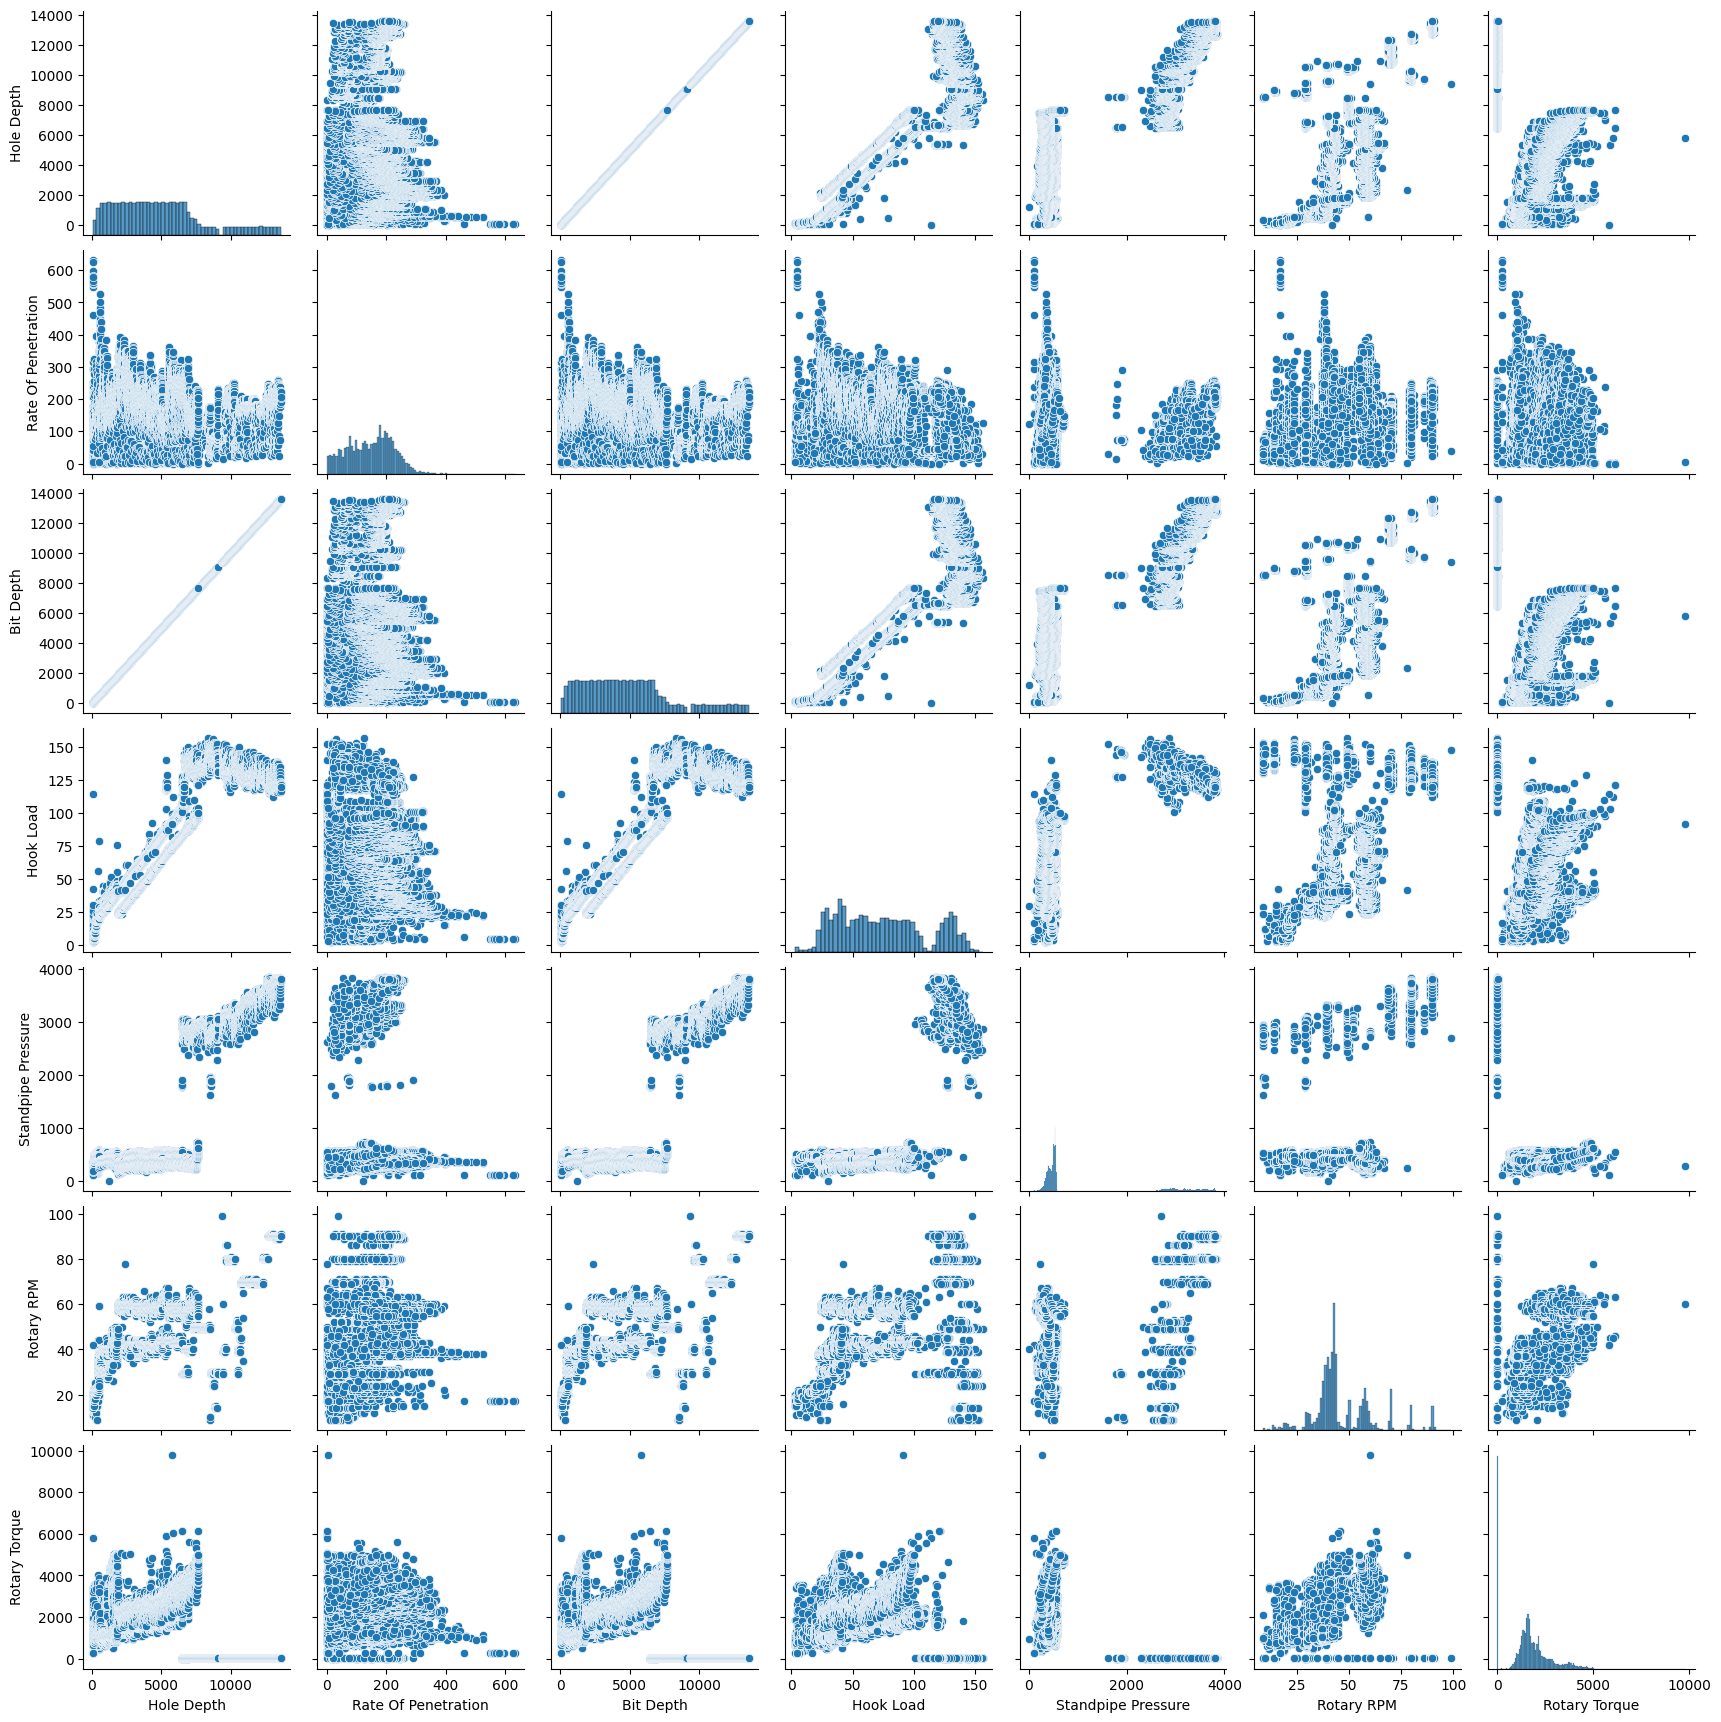

In [72]:
sns.pairplot(RPM_clean[ROP_clean.columns[:7]], palette="husl")

## <h2 align="center"><b>FEATURE ENGINEERING</b></h2>

In [73]:
def plot_all_dist(df):
    # Plot the distribution of all parameters
    f, axes = plt.subplots(4, 2, figsize=(12, 12))
    sns.distplot(df['Hole Depth'], color="red", ax=axes[0, 0], axlabel='Measured Depth (ft)')
    sns.distplot(df['Hook Load'], color="olive", ax=axes[0, 1], axlabel='Hook Load (Klbs)')
    sns.distplot(df['Rate Of Penetration'], color="blue", ax=axes[1, 0], axlabel='Rate of Penetration (ft/hr)')
    sns.distplot(df['Rotary RPM'], color="orange", ax=axes[1, 1], axlabel='Rotary rpm')
    sns.distplot(df['Rotary Torque'], color="black", ax=axes[2, 0],axlabel='Rotary Torque (Klbs-ft)')
    sns.distplot(df['Weight on Bit'], color="green", ax=axes[2, 1],axlabel='Weight on bit (Klbs)')
    sns.distplot(df['Differential Pressure'], color="brown", ax=axes[3, 0],axlabel='Differential Pressure (psi)')
    plt.tight_layout()


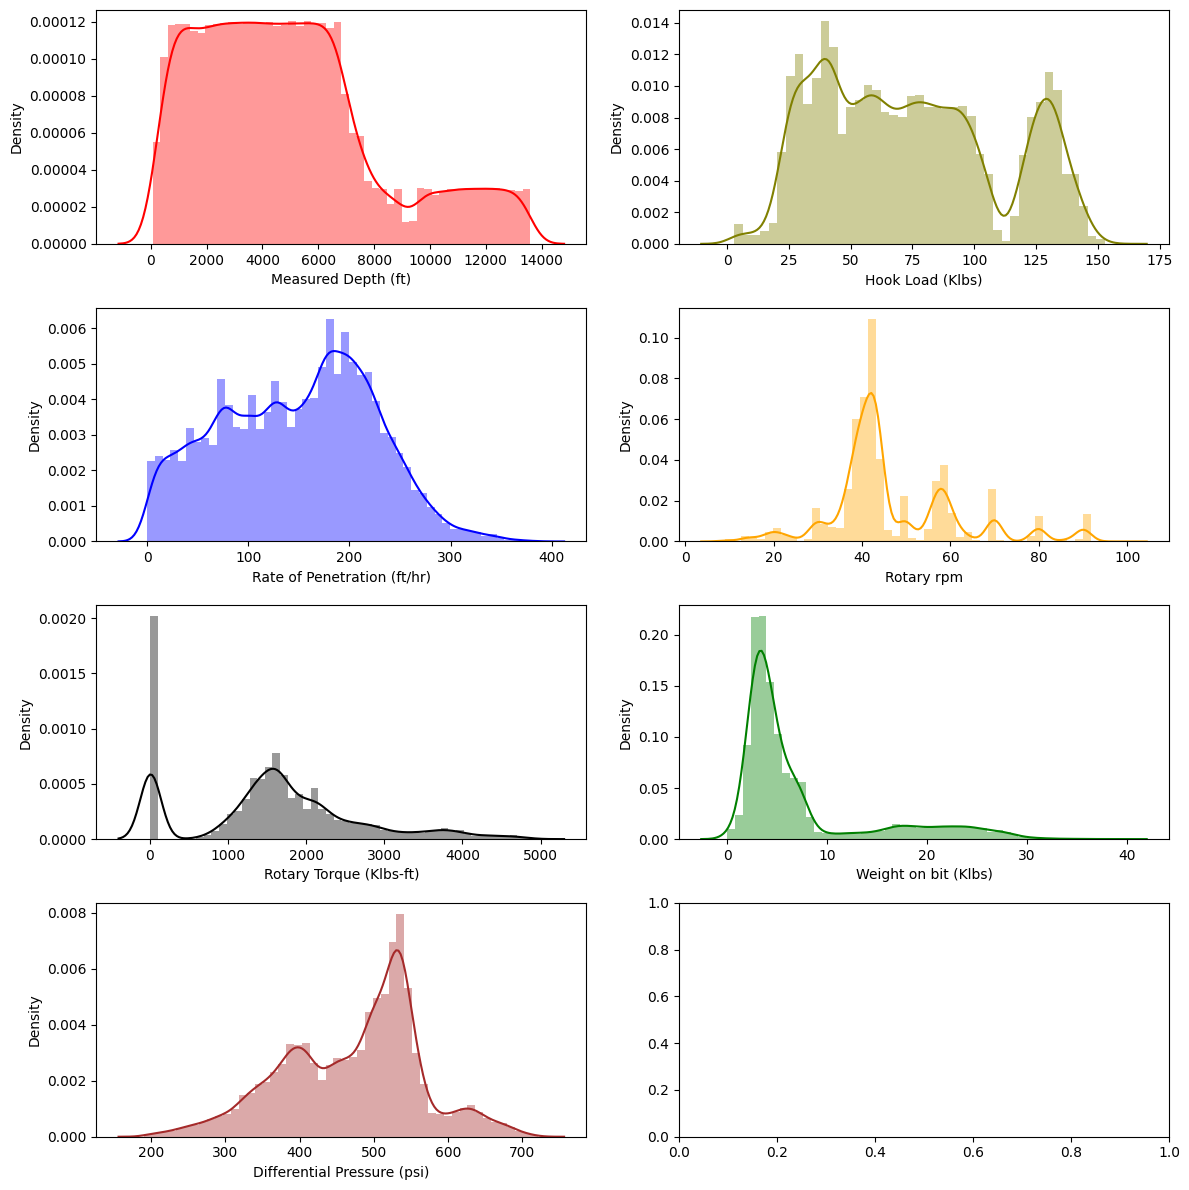

In [74]:
plot_all_dist(ROP_clean)

### Feature Transformations

Skewed variables like WOB and Torque are transformed to reduce their skewness. Both log1p and Box-Cox are tried, with Box-Cox yielding nearly normal distributions. This is essential to stabilize variance and improve model sensitivity.

In [75]:
#     # Logarithmic transformation of 'Weight on Bit' and 'Rotary Torque'
# df1['Weight on Bit'] = np.log1p(df1['Weight on Bit'])
# # df1['Rotary Torque'] = np.log1p(df1['Rotary Torque'])

In [76]:
def log_transform(df, column_name):
    # Logarithmic transformation of features
    df[column_name] = np.log1p(df[column_name])

    # Check the skewness of the transformed features
    print(f"Skewness of {column_name} Transformed:",  df[column_name].skew())
    
    return df

In [77]:
df1 = ROP_clean.copy()
df1_T = log_transform(df1, 'Weight on Bit')
df1_T = log_transform(df1_T, 'Rotary Torque')

Skewness of Weight on Bit Transformed: 0.8100629228772855
Skewness of Rotary Torque Transformed: -1.4338303863642339


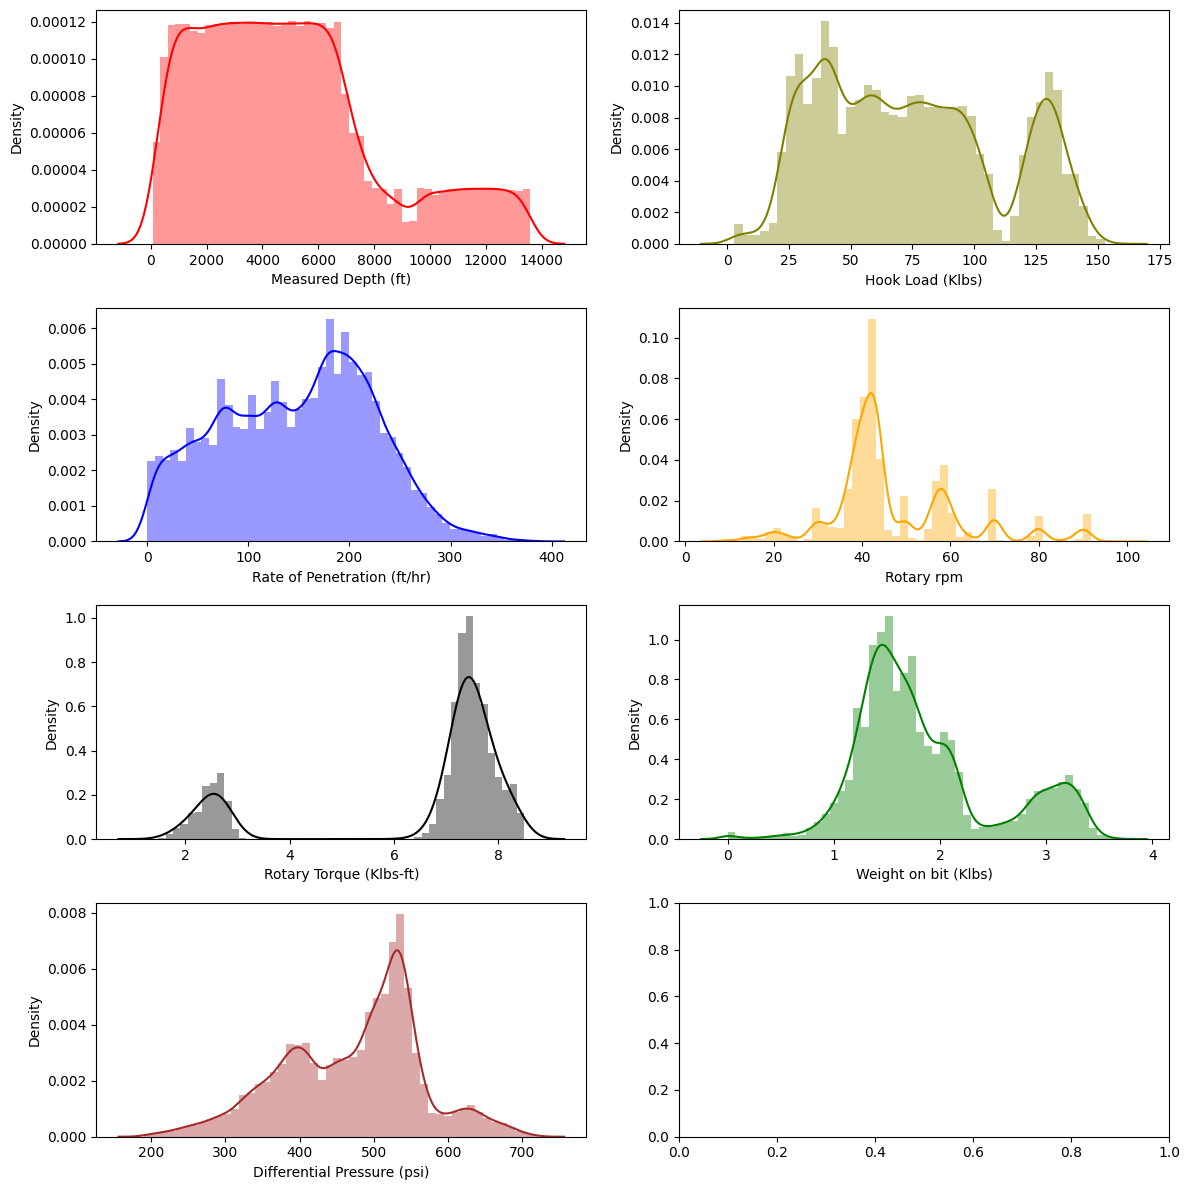

In [78]:
plot_all_dist(df1_T)

In [79]:
from scipy.stats import boxcox

# Assuming df is your main DataFrame
def boxcox_transform(df, column_name):
    # Ensure all values in the column are positive
    df[column_name] = df[column_name] - df[column_name].min() + 0.1  # Add 1 to avoid zero values
    
    # Apply Box-Cox transformation to 'parameter'
    transformed, no_use = boxcox(df[column_name])

    # Create new columns in the DataFrame for the transformed features
    df[column_name] = transformed

    # Check the skewness of the transformed features
    print(f"Skewness of {column_name} Transformed:",  df[column_name].skew())

    return df


In [80]:
df2 = ROP_clean.copy()
df2_T = boxcox_transform(df2, 'Weight on Bit')
df2_T = boxcox_transform(df2_T, 'Rotary Torque')

Skewness of Weight on Bit Transformed: -0.03179590375991886
Skewness of Rotary Torque Transformed: -0.6840224183770378


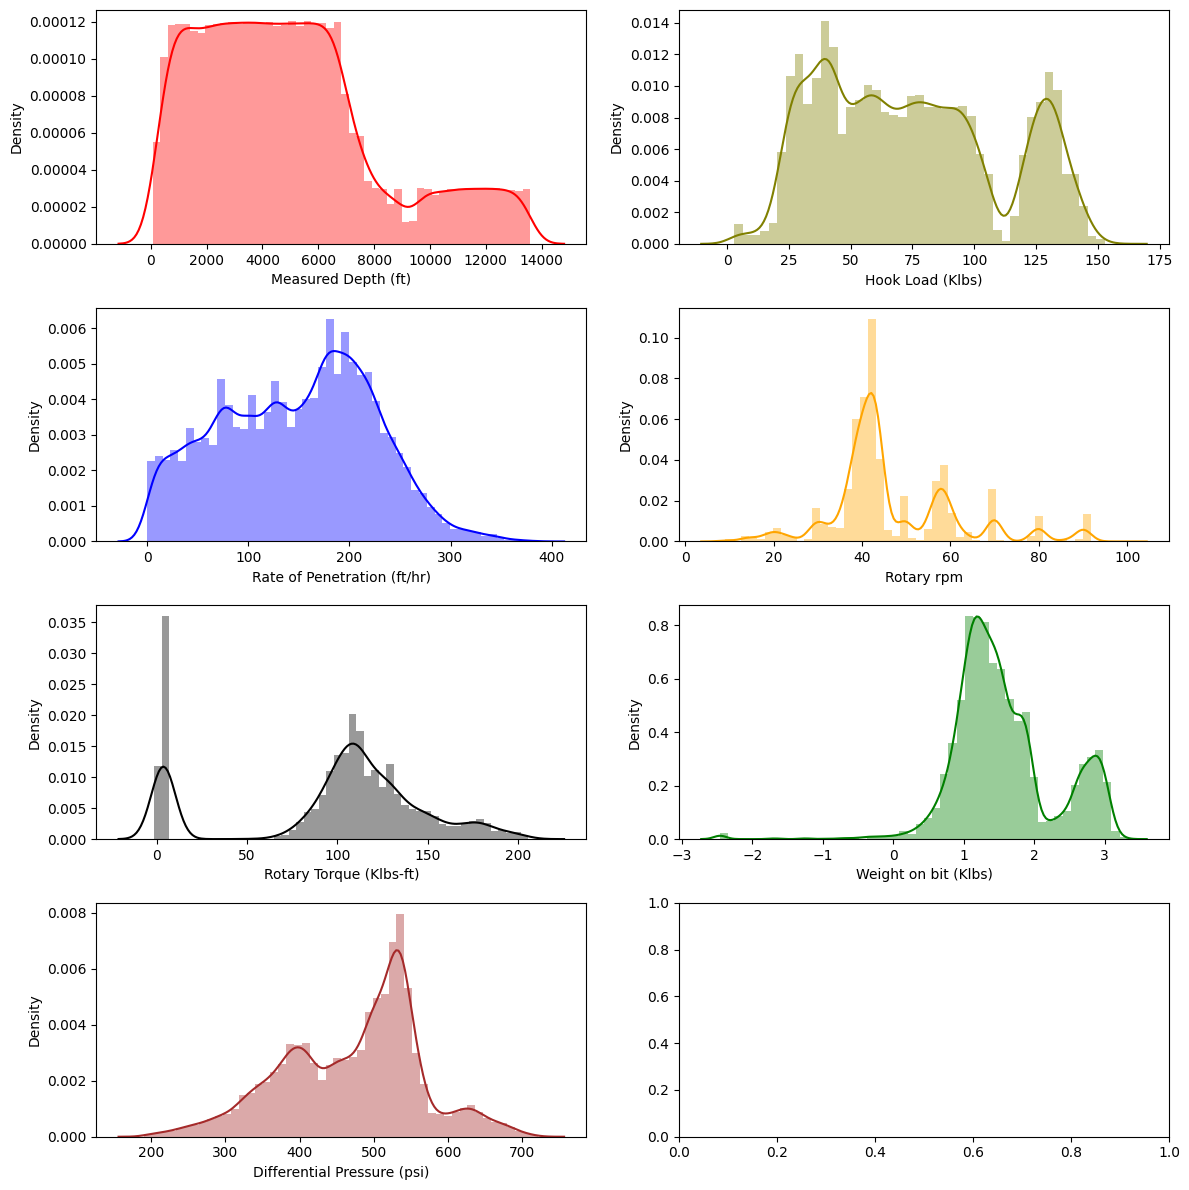

In [81]:
# sns.distplot(RTT['Weight'], color="black", axlabel='Rotary Torque (Klbs-ft)')
plot_all_dist(df2_T)

### Physics-Informed Feature Engineering (MSE)

A new feature—Mean Specific Energy (MSE)—is engineered using mechanical principles. MSE combines torque, RPM, WOB, and ROP to reflect drilling efficiency and formation response. This is a smart integration of physical intuition into statistical modeling.

In [82]:
import math

def create_mse(df):
    mse_values = []
    for i in range(len(df)):
        # Extract variables for MSE calculation
        rpm = df['Rotary RPM'][i]
        torque = df['Rotary Torque'][i]
        rop_avg = df['Rate Of Penetration'][i]
        wob = df['Weight on Bit'][i]
        hole_diameter = 8.5

        # Calculate MSE, avoiding division by zero if ROP is not zero
        if rop_avg != 0:
            diam = hole_diameter  # Assuming diameter is retrieved from bhainfo
            mse = ((480 * torque * rpm) / (diam**2 * rop_avg)) + ((4 * wob) / (diam**2 * math.pi))
        else:
            mse = 0
        
        mse_values.append(mse)
    
    df['MSE'] = mse_values
    return df


In [83]:
# #This is an alternative code for calculating MSE
# import math

# def create_mse(df):
#     for i in df.index:
#         # Extract variables for MSE calculation
#         rpm = df.at[i, 'Rotary RPM']
#         torque = df.at[i, 'Rotary Torque']
#         rop_avg = df.at[i, 'Rate Of Penetration']
#         wob = df.at[i, 'Weight on Bit']
#         hole_diameter = 8.5

#         # Calculate MSE, avoiding division by zero if ROP is not zero
#         if rop_avg != 0:
#             diam = hole_diameter  # Assuming diameter is retrieved from bhainfo
#             mse = ((480 * torque * rpm) / (diam**2 * rop_avg)) + ((4 * wob) / (diam**2 * math.pi))
#         else:
#             mse = 0
        
#         df.at[i, 'MSE'] = mse
    
#     return df


In [ ]:
df3 = create_mse(df2_T)

In [ ]:
df3.head()

,Hole Depth,Rate Of Penetration,Bit Depth,Hook Load,Standpipe Pressure,Rotary RPM,Rotary Torque,Weight on Bit,On Bottom ROP,Block Height,On Bottom Hours,Circulating Hours,Inclination,Azimuth,Differential Pressure,YYYY/MM/DD,HH:MM:SS,Well ID,TimeStamp,MSE
0,59,4.86,59,5.5,235,20.0,167.785899,1.778139,4.86,34.2,0.0,0.1,2.9,154.06,234.6,7/7/2015,0:18:18,MIP3A,2015-07-07 00:18:18,4587.283055
1,60,16.17,60,2.9,323,20.0,84.047954,1.749937,16.17,33.8,0.0,0.1,2.9,154.06,323.2,7/7/2015,0:18:47,MIP3A,2015-07-07 00:18:47,690.668896
2,61,29.55,61,4.6,327,20.0,86.003531,1.791899,29.55,32.8,0.0,0.1,2.9,154.06,327.4,7/7/2015,0:19:23,MIP3A,2015-07-07 00:19:23,386.747613
3,62,38.89,62,3.3,328,20.0,89.480537,1.735479,38.89,31.7,0.0,0.1,2.9,154.06,328.4,7/7/2015,0:19:47,MIP3A,2015-07-07 00:19:47,305.750701
4,63,49.37,63,3.3,328,20.0,80.829397,1.778139,49.37,30.9,0.0,0.1,2.9,154.06,328.4,7/7/2015,0:20:12,MIP3A,2015-07-07 00:20:12,217.571570


## Feature Selection and Correlation Analysis

A reduced feature set is chosen based on theoretical and empirical relevance. Spearman and Pearson correlations with ROP are calculated and visualized. Features such as RPM and Differential Pressure exhibit moderate correlation, while MSE has a negative correlation with ROP, consistent with its definition.

In [ ]:
selected = ['Rate Of Penetration', 'Rotary Torque', 'Rotary RPM', 'Weight on Bit', 
            'Differential Pressure', 'Hook Load', 'MSE', 'Hole Depth']
selected

['Rate Of Penetration',
 'Rotary Torque',
 'Rotary RPM',
 'Weight on Bit',
 'Differential Pressure',
 'Hook Load',
 'MSE',
 'Hole Depth']

In [ ]:
df4 = df3[selected]
df4.columns

Index(['Rate Of Penetration', 'Rotary Torque', 'Rotary RPM', 'Weight on Bit',
       'Differential Pressure', 'Hook Load', 'MSE', 'Hole Depth'],
      dtype='object')

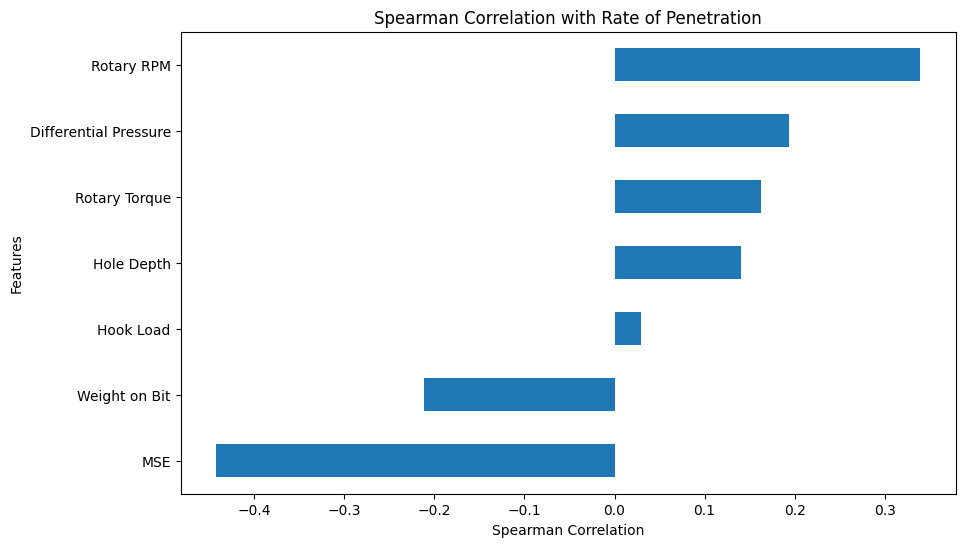

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset
# dataset = df.select_dtypes(include=['float64', 'int64'])  # Select numerical columns

scaler = StandardScaler()
datanorm = scaler.fit_transform(df4)

# Calculate Spearman correlation coefficients
rho, pval = stats.spearmanr(datanorm)

# Create a DataFrame with correlations
corr_df = pd.DataFrame(rho, columns=df4.columns, index=df4.columns)

# Select the correlations of the features with the target feature
corr_with_target = corr_df.iloc[1:8, 0]

# Plot the correlations
plt.figure(figsize=(10, 6))
corr_with_target.sort_values().plot(kind='barh')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.title('Spearman Correlation with Rate of Penetration')
plt.show()


### Persons Correlation

In [ ]:
df4.corr()

,Rate Of Penetration,Rotary Torque,Rotary RPM,Weight on Bit,Differential Pressure,Hook Load,MSE,Hole Depth
Rate Of Penetration,1.000000,0.100914,0.329924,-0.123329,0.140207,0.002704,-0.100733,0.127348
Rotary Torque,0.100914,1.000000,-0.239539,-0.783570,-0.315186,-0.602596,0.046347,-0.587397
Rotary RPM,0.329924,-0.239539,1.000000,0.238201,0.127339,0.440900,-0.014132,0.687028
Weight on Bit,-0.123329,-0.783570,0.238201,1.000000,0.382881,0.428506,-0.044267,0.452558
Differential Pressure,0.140207,-0.315186,0.127339,0.382881,1.000000,0.326378,-0.041729,0.323206
Hook Load,0.002704,-0.602596,0.440900,0.428506,0.326378,1.000000,-0.025338,0.921862
MSE,-0.100733,0.046347,-0.014132,-0.044267,-0.041729,-0.025338,1.000000,-0.030586
Hole Depth,0.127348,-0.587397,0.687028,0.452558,0.323206,0.921862,-0.030586,1.000000


### Plot the correlation heatmap

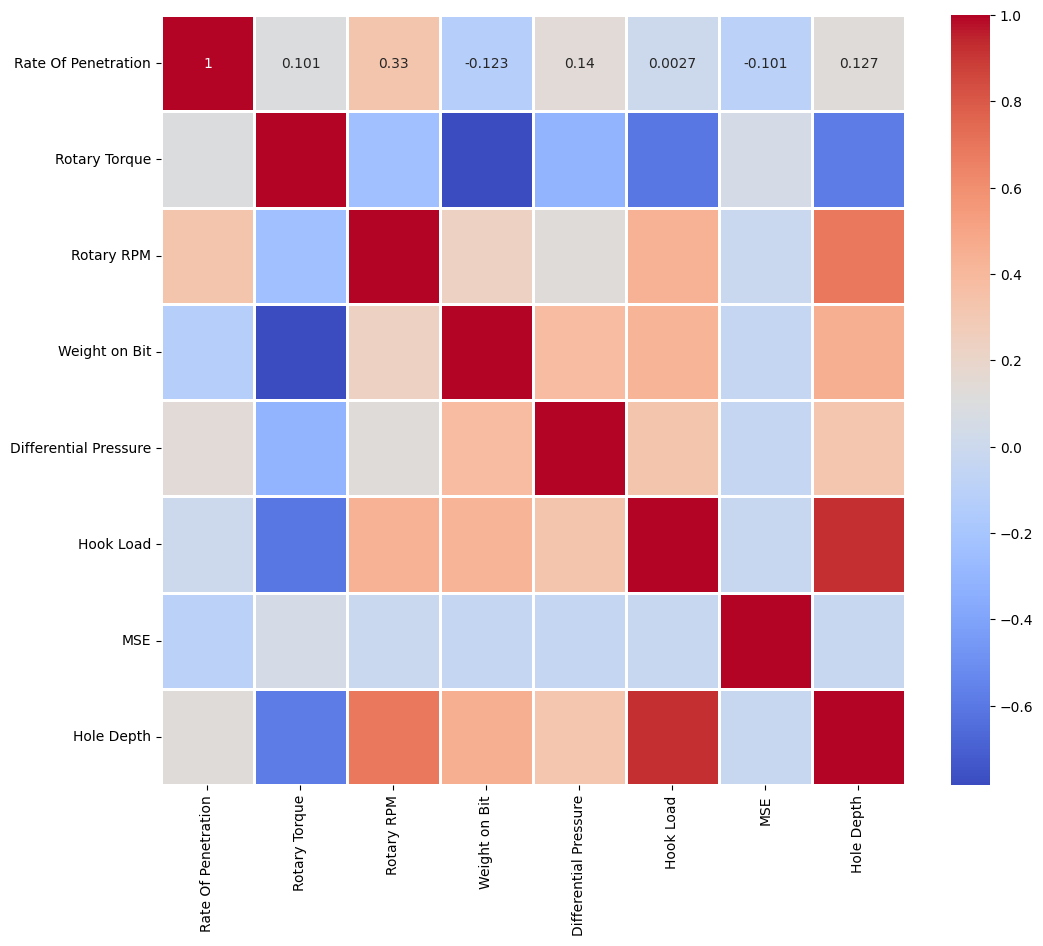

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df4.corr(), annot=True, fmt='.3g', linecolor='white', linewidths=2, cmap='coolwarm');

In [ ]:
# missingdata_df=df_scaled.columns[df_scaled.isnull().any()].tolist()
# missingdata_df

## Train-Test Split and Feature Scaling

The dataset is split into training and testing sets (70/30) and normalized using MinMaxScaler. This rescaling ensures equal contribution from each feature and avoids dominance by high-magnitude variables.

In [ ]:
from sklearn.model_selection import train_test_split

# Create a DataFrame with selected columns
df_scaled = pd.DataFrame(df4, columns=selected)

# Define X and y variables
y = df4[['Rate Of Penetration']]
X = df4.drop(['Rate Of Penetration'], axis=1)

# Split the data into training and testing sets (70/30 split)
np.random.seed(1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [ ]:
X_train[:5]

,Rotary Torque,Rotary RPM,Weight on Bit,Differential Pressure,Hook Load,MSE,Hole Depth
28582,129.525545,25.0,1.422504,357.5,23.7,93.348395,534
29631,84.960383,39.0,1.310998,401.9,36.7,106.945896,1593
3813,99.832648,38.0,1.357317,513.0,66.6,179.050952,3897
31129,136.854250,56.0,0.400951,327.6,41.0,205.104603,3110
2588,96.741234,39.0,1.675080,520.4,50.6,176.922161,2669


### Feature Scaling and Normalization

In [ ]:
from sklearn import preprocessing

# Initialize the MinMaxScaler for the training features
X_train_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Fit and transform the scaler to your DataFrame
X_train = X_train_scaler.fit_transform(X_train)


# Initialize the MinMaxScaler for the target variable
y_train_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Fit and transform the scaler to your DataFrame
y_train = y_train_scaler.fit_transform(y_train)


# Initialize the MinMaxScaler for the test features
X_test_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Fit and transform the scaler to your DataFrame
X_test = X_test_scaler.fit_transform(X_test)

# Initialize the MinMaxScaler for the test features
y_test_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Fit and transform the scaler to your DataFrame
y_test = y_test_scaler.fit_transform(y_test)



In [ ]:
X_train[:10]

array([[6.31695075e-01, 1.77777778e-01, 6.70710055e-01, 3.14242653e-01,
        1.39037433e-01, 2.49733420e-04, 3.51071693e-02],
       [4.16164569e-01, 3.33333333e-01, 6.51425793e-01, 3.97889977e-01,
        2.25935829e-01, 2.83567651e-04, 1.13377679e-01],
       [4.88091310e-01, 3.22222222e-01, 6.59436359e-01, 6.07196684e-01,
        4.25802139e-01, 4.62984378e-04, 2.83665928e-01],
       [6.67138893e-01, 5.22222222e-01, 4.94038535e-01, 2.57912585e-01,
        2.54679144e-01, 5.27812853e-04, 2.25498891e-01],
       [4.73140303e-01, 3.33333333e-01, 7.14391572e-01, 6.21137905e-01,
        3.18850267e-01, 4.57687374e-04, 1.92904656e-01],
       [8.70972655e-01, 4.88888889e-01, 5.15131441e-01, 4.00339111e-01,
        5.74197861e-01, 8.50402587e-04, 5.04582409e-01],
       [9.45303626e-01, 3.66666667e-01, 7.32214997e-01, 5.38809344e-01,
        2.24598930e-01, 5.04743206e-03, 1.01108647e-01],
       [5.10806496e-01, 3.88888889e-01, 6.63288349e-01, 5.40881688e-01,
        3.11497326e-01, 6

<h2 align="center"><b>MODEL BUILDING</b></h2>

Two regression models are deployed:

SVR (Support Vector Regression) with RBF kernel

XGBoost Regressor, a powerful gradient-boosting model
Both models are trained on the normalized features. The SVR acts as a baseline, while XGBoost is expected to outperform due to its robustness to feature interactions.

### **Define the model**

#### The Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Set random seed for reproducibility
np.random.seed(1000)

# Create SVR model
SVM = SVR(
    kernel='rbf', 
    gamma=1.5, 
    C=5
    )


#### The XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Set the random seed
np.random.seed(1000)

# Define XGBRegressor with specified parameters
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    reg_lambda=1,
    max_depth=3,
    learning_rate=0.1,
    reg_alpha=0.1
)

### **Train the model**

In [ ]:
#The first model we will use will be a support vector regressor model(SVR)
# Fit the model
X_train1 = X_train.copy()
y_train1 = y_train.copy()
SVM.fit(X_train1, np.ravel(y_train1))


SVR(C=5, gamma=1.5)

In [ ]:
# The second model will be an extreme gradient boosting model(xgboost)
X_train2 = X_train.copy()
y_train2 = y_train.copy()

xgb.fit(X_train2,y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## **Create Predictions**

Models are evaluated using R² scores:

SVR: ~0.68 R² on both train and test

XGBoost: ~0.98 R² train, ~0.98 test
This sharp contrast confirms XGBoost's superior ability to learn nonlinear mappings.

In [ ]:
# Predictions for SVR Model
y_pred_train = SVM.predict(X_train)
y_pred_test = SVM.predict(X_test)

In [ ]:
X_test2 = X_test.copy()
y_test2 = y_test.copy()

# Predictions for XGB model
y_pred_train2 = xgb.predict(X_train2)
y_pred_test2 = xgb.predict(X_test2)

### **Model Evaluation**

In [ ]:
# Calculate R2 score for training set for SVR model
r2_train = r2_score(y_train, y_pred_train)
print('ROP Train Data R^2 Score:', round(r2_train, 4))


ROP Train Data R^2 Score: 0.6856


In [ ]:
# Calculate R2 score for testing set for SVR model
r2_test = r2_score(y_test, y_pred_test)
print('ROP Test Data R^2 Score:', round(r2_test, 4))

ROP Test Data R^2 Score: 0.6842


In [ ]:
# Calculate correlation and print R^2 for training data for XGB model
corr_train = np.corrcoef(y_train2.squeeze(), y_pred_train2.squeeze())[0, 1]
print(f'Training Data R^2: {round(corr_train**2, 4)} R: {round(corr_train, 4)}')

# Calculate correlation and print R^2 for testing data for XGB model
corr_test = np.corrcoef(y_test2.squeeze(), y_pred_test2.squeeze())[0, 1]
print(f'Testing Data R^2: {round(corr_test**2, 4)} R: {round(corr_test, 4)}')


Training Data R^2: 0.9871 R: 0.9935
Testing Data R^2: 0.9807 R: 0.9903


### Prediction Visualization

Scatter plots of actual vs predicted ROP values show tighter clustering for XGBoost, while SVR displays wider variance. This visual validation reinforces model choice.

### Plot the ROP actual values vs predictions for the test set

Text(0.5, 1.0, 'ROP Testing Actual vs. Prediction')

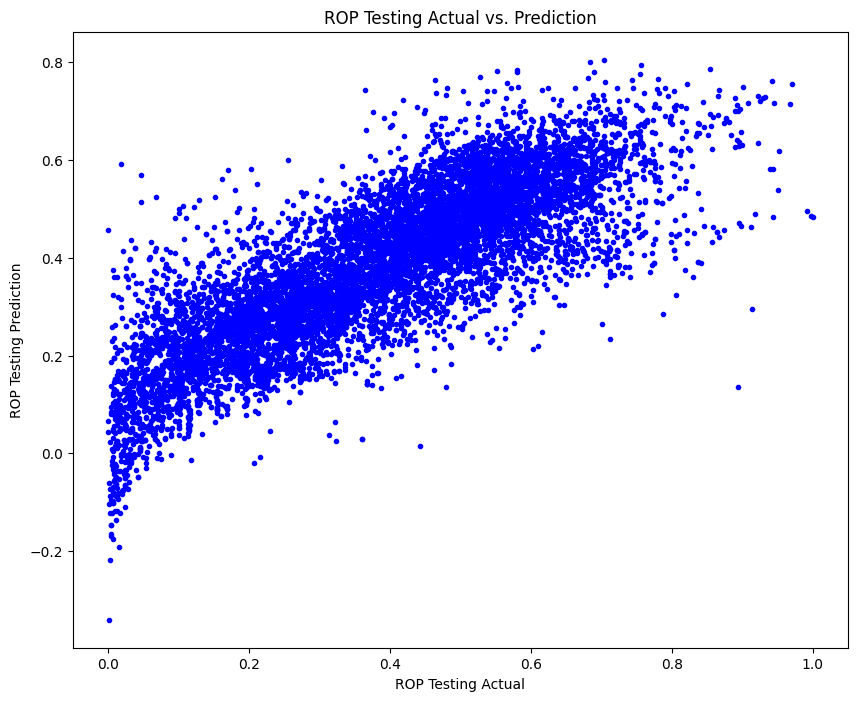

In [ ]:
# Plot the ROP actual vs predictions for SVR model
plt.figure(figsize=(10,8))
plt.plot(y_test['Rate Of Penetration'], y_pred_test, 'b.')
plt.xlabel('ROP Testing Actual')
plt.ylabel('ROP Testing Prediction')
plt.title('ROP Testing Actual vs. Prediction')

In [ ]:
y_pred_test2

array([0.55187106, 0.32620677, 0.47109196, ..., 0.2687487 , 0.5776286 ,
       0.15967669], dtype=float32)

Text(0.5, 1.0, 'ROP Training Actual vs. Prediction')

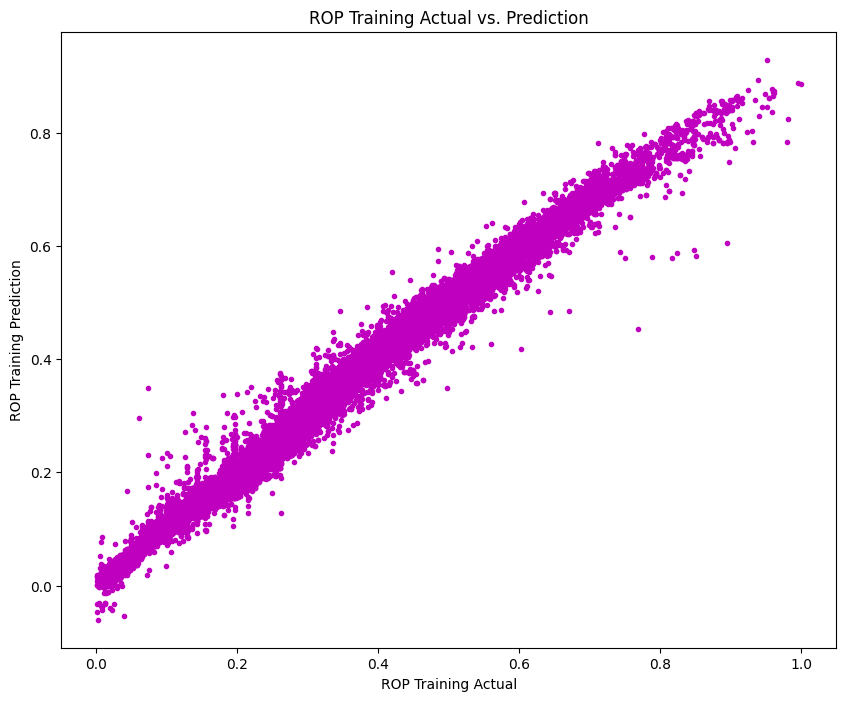

In [ ]:
# Plot the ROP actual vs predictions for XGB model (train data)
plt.figure(figsize=(10,8))
plt.plot(y_train2, y_pred_train2, 'm.')
plt.xlabel('ROP Training Actual')
plt.ylabel('ROP Training Prediction')
plt.title('ROP Training Actual vs. Prediction')

Text(0.5, 1.0, 'ROP Testing Actual vs. Prediction')

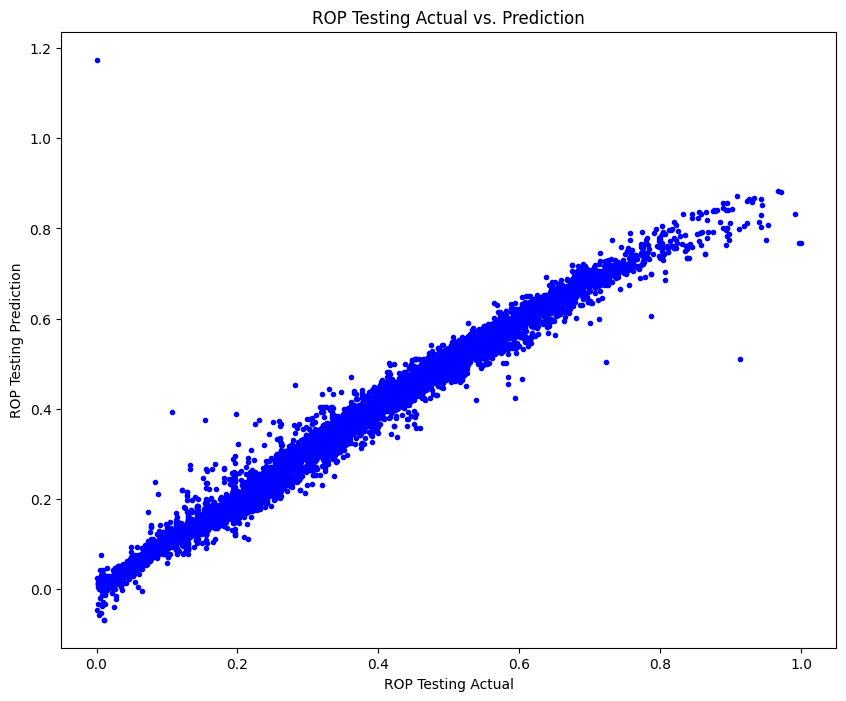

In [ ]:
# Plot the ROP actual vs predictions for XGB model (test data)
plt.figure(figsize=(10,8))
plt.plot(y_test2, y_pred_test2, 'b.')
plt.xlabel('ROP Testing Actual')
plt.ylabel('ROP Testing Prediction')
plt.title('ROP Testing Actual vs. Prediction')

### Print the model evaluation metrics

Evaluation continues with MAE, MSE, and RMSE. XGBoost's RMSE (~0.027) is significantly lower than SVR (~0.109), confirming high predictive precision.

In [ ]:
# Print the model evaluation metrics for SVR model

from sklearn import metrics

# Calculate and print testing ROP metrics
mae = metrics.mean_absolute_error(y_test['Rate Of Penetration'], y_pred_test)
mse = metrics.mean_squared_error(y_test['Rate Of Penetration'], y_pred_test)
rmse = np.sqrt(mse)

print('Testing ROP MAE:', round(mae, 4))
print('Testing ROP MSE:', round(mse, 4))
print('Testing ROP RMSE:', round(rmse, 4))


Testing ROP MAE: 0.082
Testing ROP MSE: 0.0119
Testing ROP RMSE: 0.1093


In [ ]:
# Print the model evaluation metrics for XGB model
from sklearn import metrics

# Calculate and print Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test2, y_pred_test2)
print(f'MAE: {mae:.5f}')

# Calculate and print Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test2, y_pred_test2)
print(f'MSE: {mse:.5f}')

# Calculate and print Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.5f}')


MAE: 0.01666
MSE: 0.00073
RMSE: 0.02704


### Feature Importances

Using XGBoost’s built-in feature importance, we identify the most influential parameters: Torque, RPM, and MSE dominate. This ranking aligns well with physical drilling dynamics and offers actionable levers for optimization.

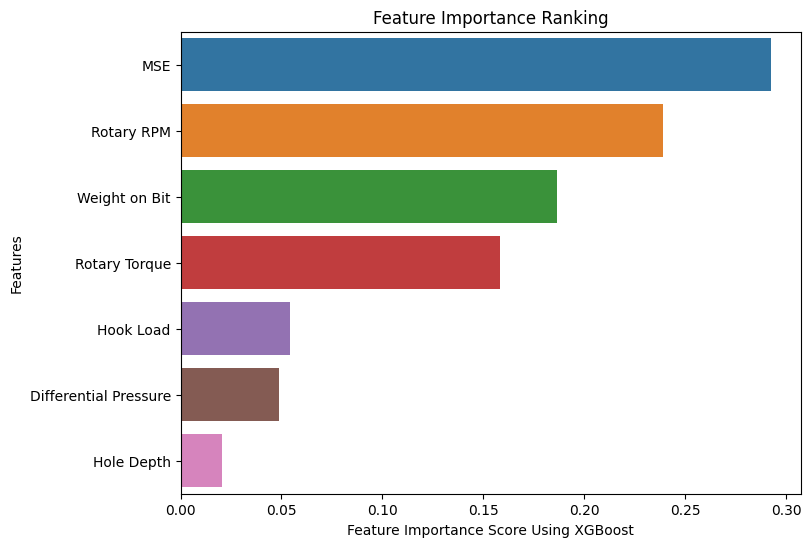

In [ ]:
# Feature Importance for the XGB model
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
feature_imp = pd.Series(xgb.feature_importances_, index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using XGBoost')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

### Result Compilation and Reverse Scaling

Predictions are inverse-transformed to original units and tabulated with actual ROP. The final visual comparison plot confirms the high fidelity of the model—suggesting this workflow is ready for operational deployment or real-time advisory augmentation.

In [ ]:
# Transform your scaled data back to the original scale
y_test_original = y_test_scaler.inverse_transform(y_test2)
y_test_original[:10]

array([[201.06429349],
       [124.17030021],
       [172.61651574],
       [161.83735777],
       [196.4646528 ],
       [117.04085714],
       [126.16014477],
       [ 49.88610305],
       [ 70.30450803],
       [135.31942927]])

In [ ]:
original_array.reshape(-1, 1)

In [ ]:
# Transform your scaled data back to the original scale
y_pred_test_original = y_test_scaler.inverse_transform(y_pred_test2.reshape(-1,1))
y_pred_test_original[:10]

array([[211.94057 ],
       [125.27645 ],
       [180.91815 ],
       [160.99252 ],
       [202.09653 ],
       [118.05063 ],
       [125.82449 ],
       [ 49.504223],
       [ 57.950775],
       [142.3361  ]], dtype=float32)

In [ ]:
# Concatenate arrays column-wise and create a DataFrame
Results = pd.DataFrame(np.column_stack((y_pred_test_original, y_test_original)), columns=['Predicted', 'Actual'])
Results.head()

,Predicted,Actual
0,211.940567,201.064293
1,125.276451,124.170300
2,180.918152,172.616516
3,160.992523,161.837358
4,202.096527,196.464653


Text(0.5, 1.0, 'ROP Testing Actual vs. Prediction')

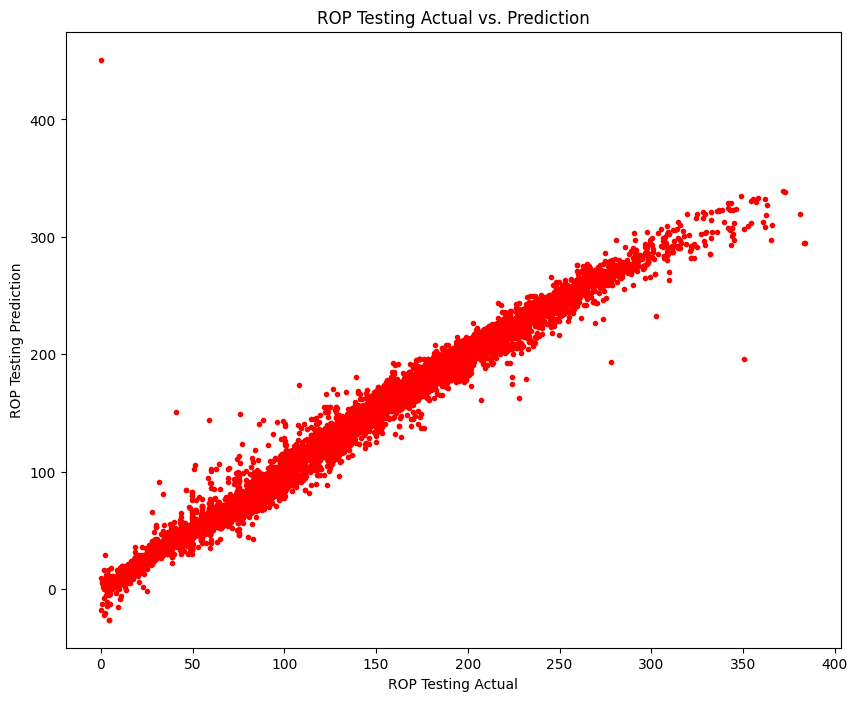

In [ ]:
# Plot the ROP actual vs predictions for XGB model (test data)
plt.figure(figsize=(10,8))
plt.plot(Results['Actual'], Results['Predicted'], 'r.')
plt.xlabel('ROP Testing Actual')
plt.ylabel('ROP Testing Prediction')
plt.title('ROP Testing Actual vs. Prediction')

In [ ]:
# Transform your scaled data back to the original scale
X_test_original = X_test_scaler.inverse_transform(X_test)
X_test_original[:10]

array([[1.02035184e+02, 4.30000000e+01, 1.28688970e+00, 5.19400000e+02,
        5.56000000e+01, 1.44984260e+02, 2.95800000e+03],
       [1.86998453e+02, 6.10000000e+01, 8.93452104e-01, 3.62700000e+02,
        9.51000000e+01, 6.10282314e+02, 7.38900000e+03],
       [1.35617809e+02, 6.00000000e+01, 8.54604190e-01, 3.83700000e+02,
        3.92000000e+01, 3.13166987e+02, 3.05500000e+03],
       [1.13660814e+02, 4.20000000e+01, 1.35731723e+00, 5.55900000e+02,
        7.96000000e+01, 1.95976385e+02, 4.83100000e+03],
       [4.82804282e+00, 9.00000000e+01, 2.80992200e+00, 6.69800000e+02,
        1.22000000e+02, 1.47421185e+01, 1.28430000e+04],
       [6.56672227e+01, 1.50000000e+01, 1.84481962e+00, 3.67600000e+02,
        4.00000000e+00, 5.59402428e+01, 1.29000000e+02],
       [1.28183939e+02, 4.40000000e+01, 5.78331789e-01, 5.14200000e+02,
        1.00100000e+02, 2.96994548e+02, 6.33500000e+03],
       [1.06186581e+02, 3.80000000e+01, 1.52136928e+00, 4.49900000e+02,
        6.63000000e+01, 5

In [ ]:
X_test_original_df = pd.DataFrame(X_test_original, columns=selected[1:])
X_test_original_df.head()

,Rotary Torque,Rotary RPM,Weight on Bit,Differential Pressure,Hook Load,MSE,Hole Depth
0,102.035184,43.0,1.286890,519.4,55.6,144.984260,2958.0
1,186.998453,61.0,0.893452,362.7,95.1,610.282314,7389.0
2,135.617809,60.0,0.854604,383.7,39.2,313.166987,3055.0
3,113.660814,42.0,1.357317,555.9,79.6,195.976385,4831.0
4,4.828043,90.0,2.809922,669.8,122.0,14.742119,12843.0


In [ ]:
X_test_original_df['Predicted ROP'] = Results['Predicted']
X_test_original_df['Actual ROP'] = Results['Actual']

In [ ]:
X_test_original_df.head()

,Rotary Torque,Rotary RPM,Weight on Bit,Differential Pressure,Hook Load,MSE,Hole Depth,Predicted ROP,Actual ROP
0,102.035184,43.0,1.286890,519.4,55.6,144.984260,2958.0,211.940567,201.064293
1,186.998453,61.0,0.893452,362.7,95.1,610.282314,7389.0,125.276451,124.170300
2,135.617809,60.0,0.854604,383.7,39.2,313.166987,3055.0,180.918152,172.616516
3,113.660814,42.0,1.357317,555.9,79.6,195.976385,4831.0,160.992523,161.837358
4,4.828043,90.0,2.809922,669.8,122.0,14.742119,12843.0,202.096527,196.464653


### Visualize Actual ROP against Predicted

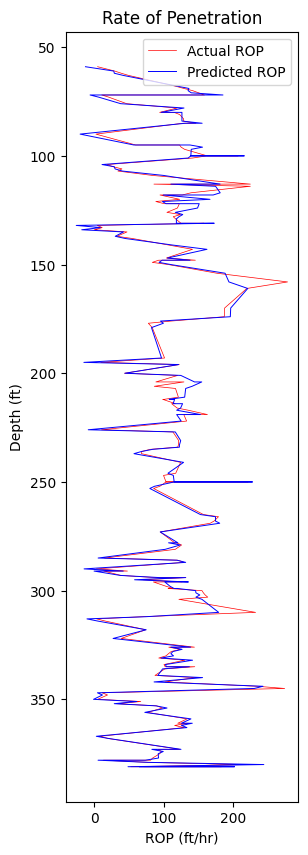

In [ ]:
# Sort the DataFrame based on 'Hole Depth'
X_test_original_df_sorted = X_test_original_df.sort_values(by='Hole Depth')[:200]

# Create the plot
plt.figure(figsize=(3, 10))
plt.plot(X_test_original_df_sorted['Actual ROP'], X_test_original_df_sorted['Hole Depth'], linewidth=0.5, color='red', label='Actual ROP')
plt.plot(X_test_original_df_sorted['Predicted ROP'], X_test_original_df_sorted['Hole Depth'], linewidth=0.7, color='blue', label='Predicted ROP')
plt.xlabel("ROP (ft/hr)")
plt.ylabel("Depth (ft)")
plt.title("Rate of Penetration")
plt.legend(loc='upper right')

plt.gca().invert_yaxis()
plt.show()

### Save model to a pickle file format

In [ ]:
import joblib

# Assuming 'xgb' is your trained XGBoost model
model_filename = 'rop_model_xgb.pkl'

# Save the model to a file
joblib.dump(xgb, model_filename)


['rop_model_xgb.pkl']

### Load model again for use

In [ ]:
import joblib


loaded_model = joblib.load('rop_model_xgb.pkl')

In [ ]:
new_dataset = pd.read_csv('freshdrillingdata.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

new_dataset

In [ ]:
# Predict ROP
predicted_rop = loaded_model.predict(new_dataset)
predicted_rop

In [ ]:
# Rescale data to original